In [ ]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import files

In [ ]:
x = torch.linspace(0,799,800)

In [ ]:
y = torch.sin(x*2*3.1416/40)

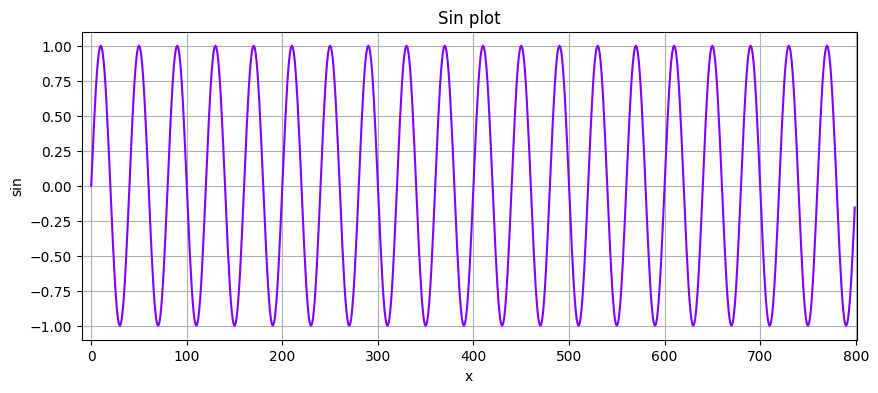

In [ ]:
plt.figure(figsize=(10,4))
plt.xlim(-10,801)
plt.grid(True)
plt.xlabel("x")
plt.ylabel("sin")
plt.title("Sin plot")
plt.plot(y.numpy(),color='#8000ff')
plt.show()

In [ ]:
test_size = 40
train_set = y[:-test_size]
test_set = y[-test_size:]

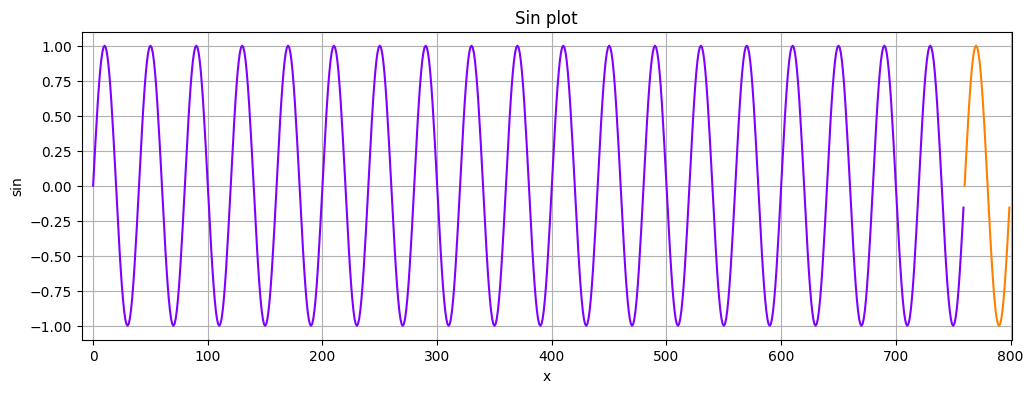

In [ ]:
plt.figure(figsize=(12,4))
plt.xlim(-10,801)
plt.grid(True)
plt.xlabel("x")
plt.ylabel("sin")
plt.title("Sin plot")
plt.plot(train_set.numpy(),color='#8000ff')
plt.plot(range(760,800),test_set.numpy(),color="#ff8000")
plt.show()

In [ ]:
def input_data(seq,ws):
    out = []
    L = len(seq)

    for i in range(L-ws):
        window = seq[i:i+ws]
        label = seq[i+ws:i+ws+1]
        out.append((window,label))

    return out

In [ ]:
window_size = 40
train_data = input_data(train_set, window_size)
len(train_data)

720

In [ ]:
window_size

40

In [ ]:
#seq

In [ ]:
train_data[0]

(tensor([ 0.0000e+00,  1.5643e-01,  3.0902e-01,  4.5399e-01,  5.8779e-01,
          7.0711e-01,  8.0902e-01,  8.9101e-01,  9.5106e-01,  9.8769e-01,
          1.0000e+00,  9.8769e-01,  9.5106e-01,  8.9100e-01,  8.0901e-01,
          7.0710e-01,  5.8778e-01,  4.5398e-01,  3.0901e-01,  1.5643e-01,
         -7.2400e-06, -1.5644e-01, -3.0902e-01, -4.5400e-01, -5.8779e-01,
         -7.0711e-01, -8.0902e-01, -8.9101e-01, -9.5106e-01, -9.8769e-01,
         -1.0000e+00, -9.8769e-01, -9.5105e-01, -8.9100e-01, -8.0901e-01,
         -7.0710e-01, -5.8777e-01, -4.5398e-01, -3.0900e-01, -1.5642e-01]),
 tensor([1.4480e-05]))

In [ ]:
class LSTM(nn.Module):

    def __init__(self,input_size = 1, hidden_size = 50, out_size = 1):
        super().__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size)
        self.linear = nn.Linear(hidden_size,out_size)
        self.hidden = (torch.zeros(1,1,hidden_size),torch.zeros(1,1,hidden_size))

    def forward(self,seq):
        lstm_out, self.hidden = self.lstm(seq.view(len(seq),1,-1), self.hidden)
        pred = self.linear(lstm_out.view(len(seq),-1))
        return pred[-1]

In [ ]:
torch.manual_seed(42)
model = LSTM()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [ ]:
model

LSTM(
  (lstm): LSTM(1, 50)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)

Epoch 0 Loss: 0.09212878346443176
Performance on test range: 0.6071590781211853


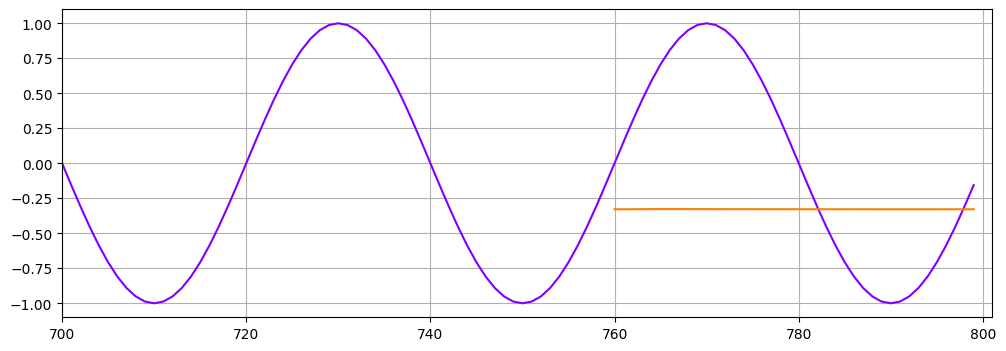

Epoch 1 Loss: 0.06506765633821487
Performance on test range: 0.5650986433029175


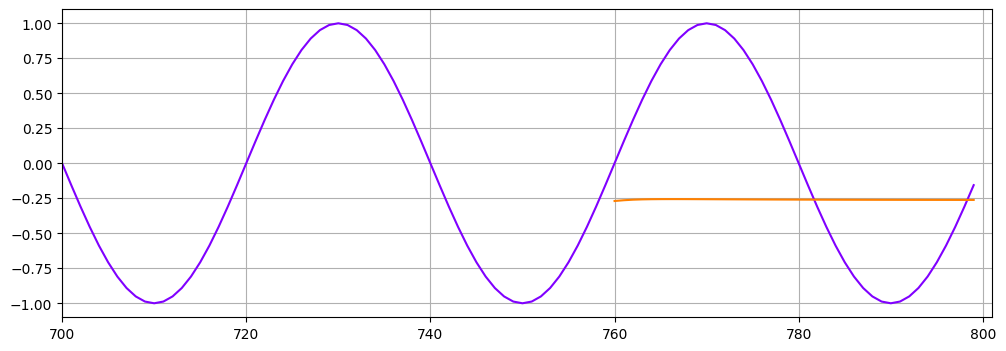

Epoch 2 Loss: 0.041980478912591934
Performance on test range: 0.5199716091156006


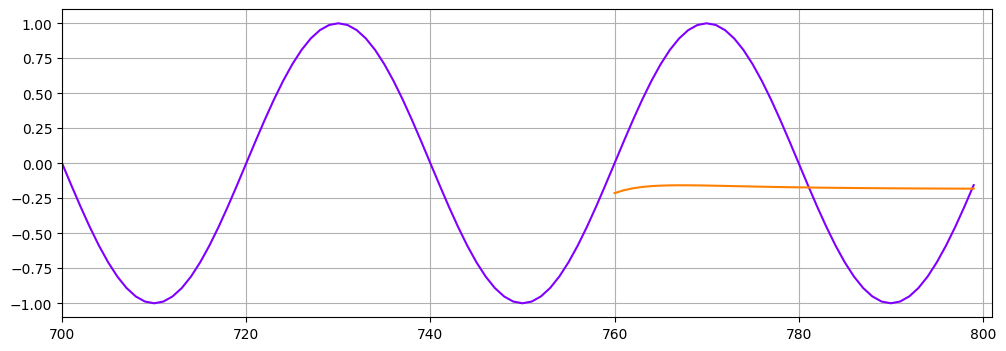

Epoch 3 Loss: 0.017842764034867287
Performance on test range: 0.42209967970848083


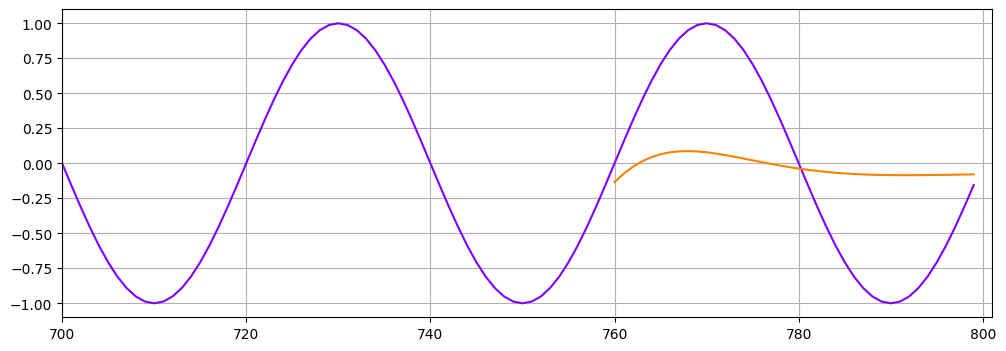

Epoch 4 Loss: 0.0028870997484773397
Performance on test range: 0.16624119877815247


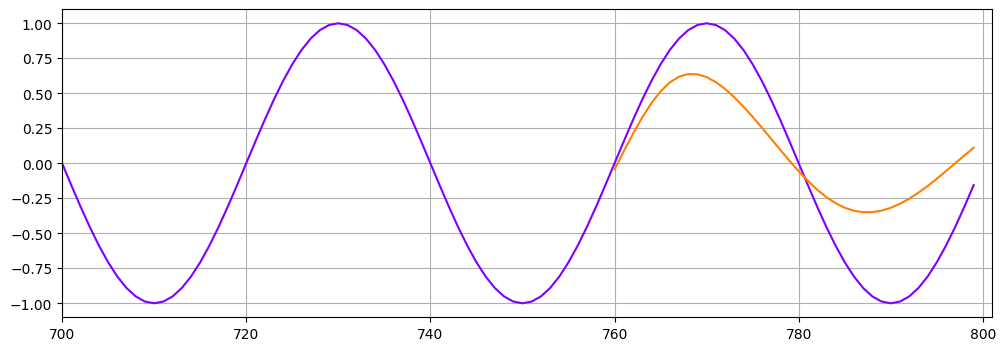

Epoch 5 Loss: 0.0003200773790013045
Performance on test range: 0.030554383993148804


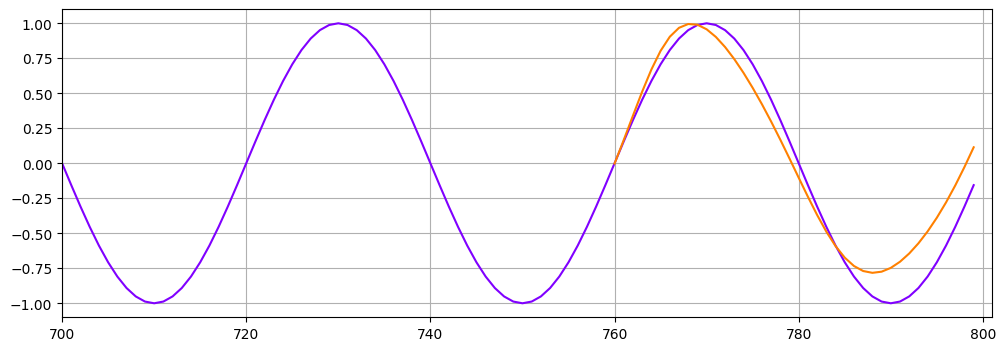

Epoch 6 Loss: 0.00012969069939572364
Performance on test range: 0.014990171417593956


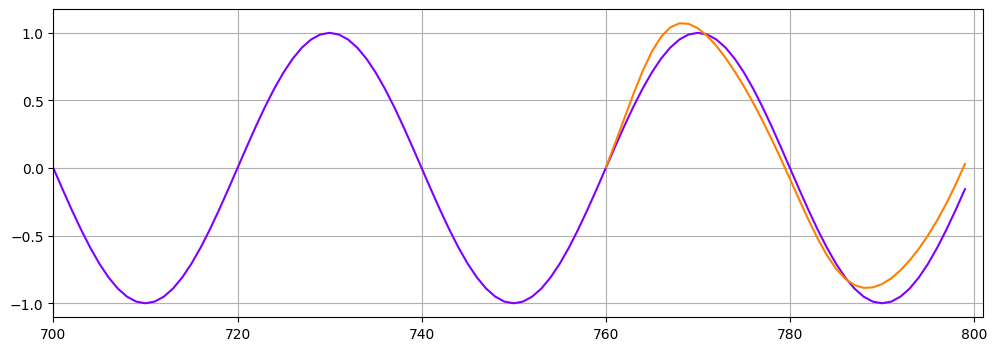

Epoch 7 Loss: 0.00012006668112007901
Performance on test range: 0.011856628581881523


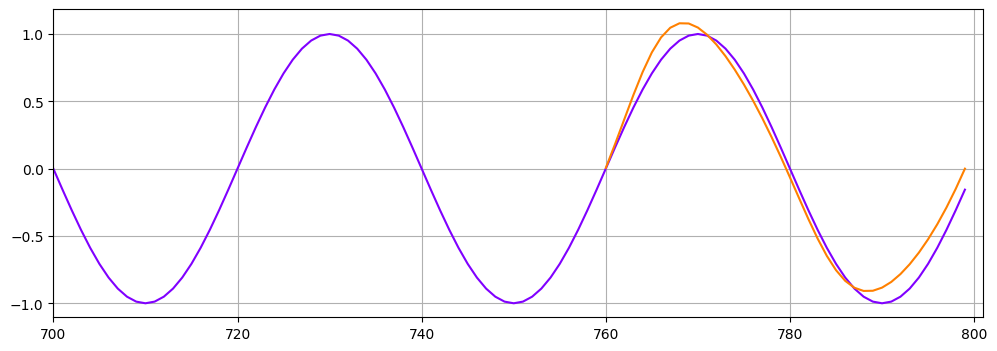

Epoch 8 Loss: 0.0001265565661014989
Performance on test range: 0.010163778439164162


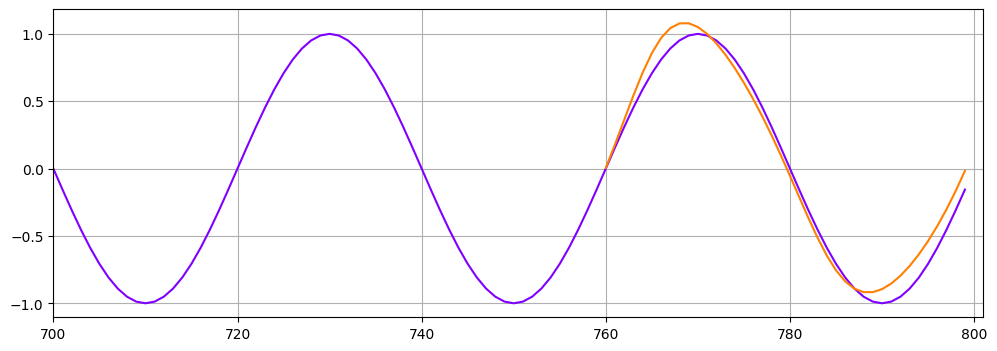

Epoch 9 Loss: 0.00013195407518651336
Performance on test range: 0.008897637948393822


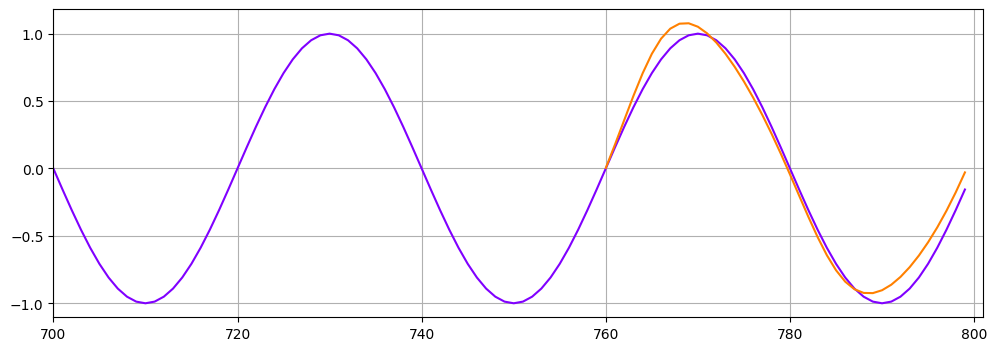

In [ ]:
epochs = 10
future = 40

for i in range(epochs):

    for seq, y_train in train_data:
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                       torch.zeros(1,1,model.hidden_size))

        y_pred = model(seq)
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()

    print(f"Epoch {i} Loss: {loss.item()}")

    preds = train_set[-window_size:].tolist()
    for f in range(future):
        seq = torch.FloatTensor(preds[-window_size:])
        with torch.no_grad():
            model.hidden = (torch.zeros(1,1,model.hidden_size),
                           torch.zeros(1,1,model.hidden_size))
            preds.append(model(seq).item())

    loss = criterion(torch.tensor(preds[-window_size:]), y[760:])
    print(f"Performance on test range: {loss}")

    plt.figure(figsize=(12,4))
    plt.xlim(700,801)
    plt.grid(True)
    plt.plot(y.numpy(),color='#8000ff')
    plt.plot(range(760,800),preds[window_size:],color='#ff8000')
    plt.show()

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/RNNs_teste/AirPassengers.csv', index_col = 0, parse_dates = True)
df.head()

#Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121

In [ ]:
df.shape

(144, 1)

In [ ]:
df.dropna(inplace=True)
len(df)

144

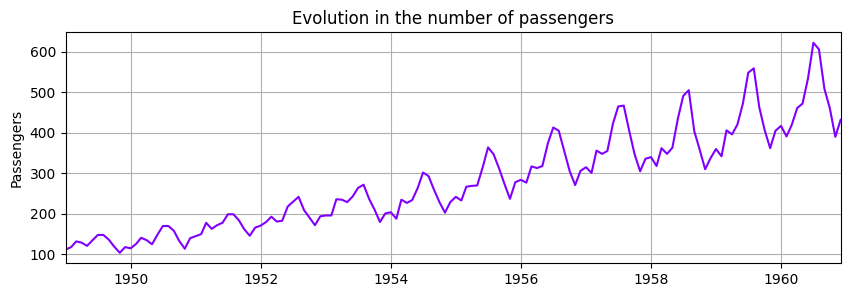

In [ ]:
plt.figure(figsize = (10,3))
plt.title('Evolution in the number of passengers')
plt.ylabel('Passengers')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(df['#Passengers'],color='#8000ff')
plt.show()

In [ ]:
#extracting the time series values
y = df['#Passengers'].values.astype(float)

#defining a test size
test_size = 12

#create train and test splits
train_set = y[:-test_size]
test_set = y[-test_size:]
test_set

array([417., 391., 419., 461., 472., 535., 622., 606., 508., 461., 390.,
       432.])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# instantiate a scaler
scaler = MinMaxScaler(feature_range=(-1, 1))

# normalize the training set
train_norm = scaler.fit_transform(train_set.reshape(-1, 1))

In [ ]:
# convert train_norm to a tensor
train_norm = torch.FloatTensor(train_norm).view(-1)

# define a window size
window_size = 12
# define a function to create sequence/label tuples
def input_data(seq,ws):
    out = []
    L = len(seq)
    for i in range(L-ws):
        window = seq[i:i+ws]
        label = seq[i+ws:i+ws+1]
        out.append((window,label))
    return out

# apply input_data to train_norm
train_data = input_data(train_norm, window_size)
len(train_data)

120

In [ ]:
train_data[0]

(tensor([-0.9648, -0.9385, -0.8769, -0.8901, -0.9253, -0.8637, -0.8066, -0.8066,
         -0.8593, -0.9341, -1.0000, -0.9385]),
 tensor([-0.9516]))

In [ ]:
class LSTMnetwork(nn.Module):
    def __init__(self,input_size=1,hidden_size=100,output_size=1):
        super().__init__()
        self.hidden_size = hidden_size

        # add an LSTM layer:
        self.lstm = nn.LSTM(input_size,hidden_size)

        # add a fully-connected layer:
        self.linear = nn.Linear(hidden_size,output_size)

        # initializing h0 and c0:
        self.hidden = (torch.zeros(1,1,self.hidden_size),
                       torch.zeros(1,1,self.hidden_size))

    def forward(self,seq):
        lstm_out, self.hidden = self.lstm(
            seq.view(len(seq),1,-1), self.hidden)
        pred = self.linear(lstm_out.view(len(seq),-1))
        return pred[-1]

In [ ]:
torch.manual_seed(42)

# instantiate
model = LSTMnetwork()

# loss
criterion = nn.MSELoss()

#optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.002)

model

LSTMnetwork(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)

Epoch:  1 Loss: 0.00033885


<Figure size 1000x300 with 0 Axes>

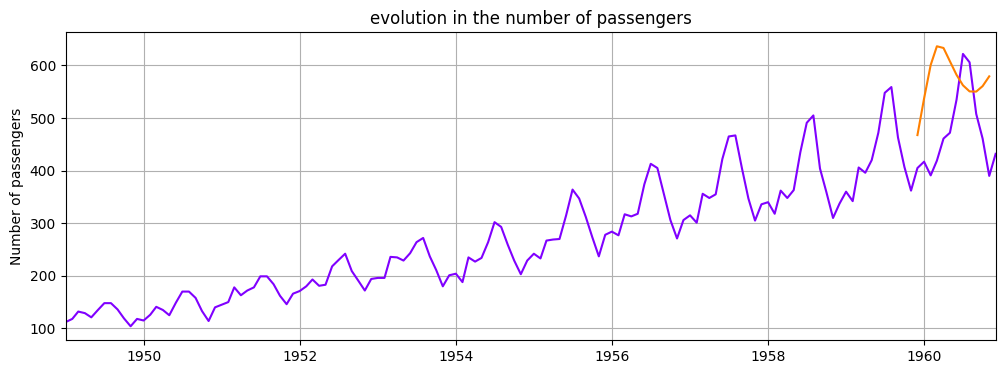

Epoch:  2 Loss: 0.02918101


<Figure size 1000x300 with 0 Axes>

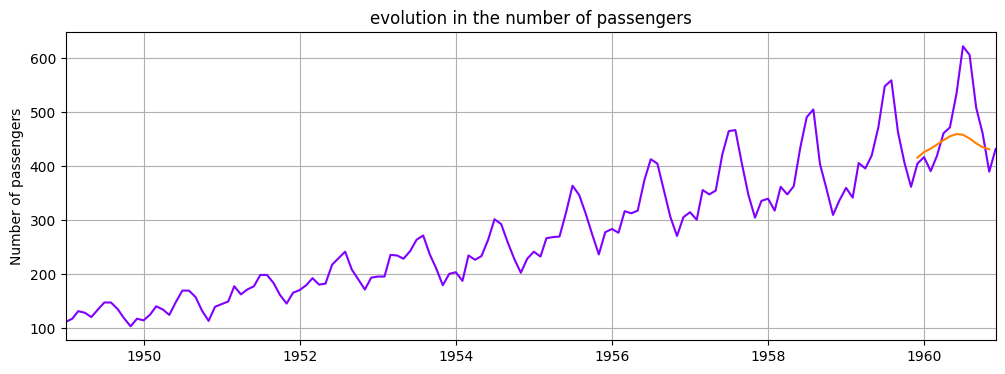

Epoch:  3 Loss: 0.02120028


<Figure size 1000x300 with 0 Axes>

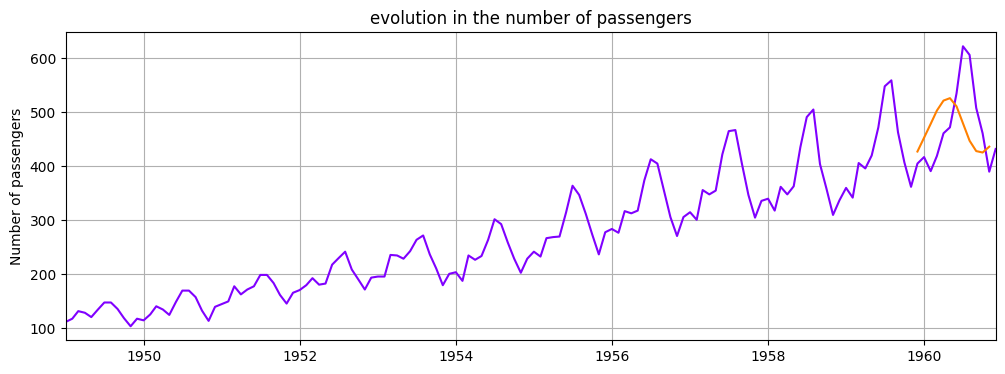

Epoch:  4 Loss: 0.05857448


<Figure size 1000x300 with 0 Axes>

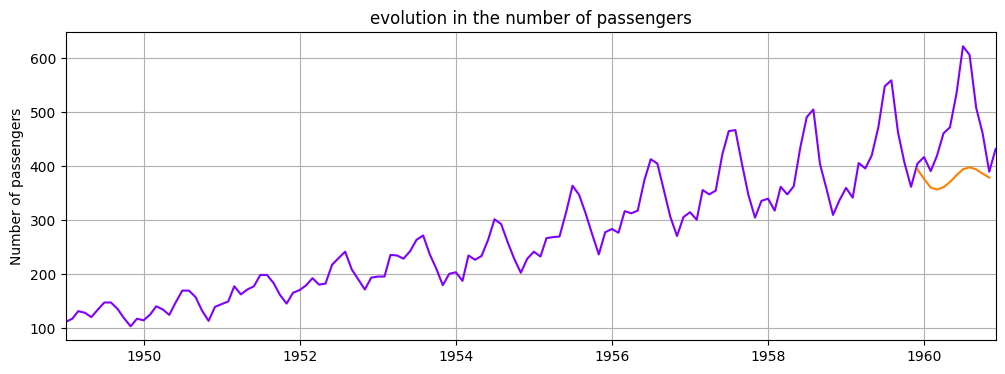

Epoch:  5 Loss: 0.01246467


<Figure size 1000x300 with 0 Axes>

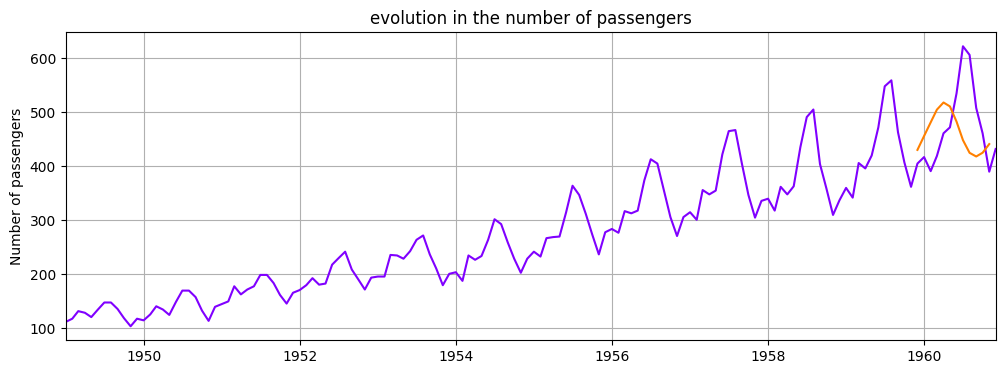

Epoch:  6 Loss: 0.02927391


<Figure size 1000x300 with 0 Axes>

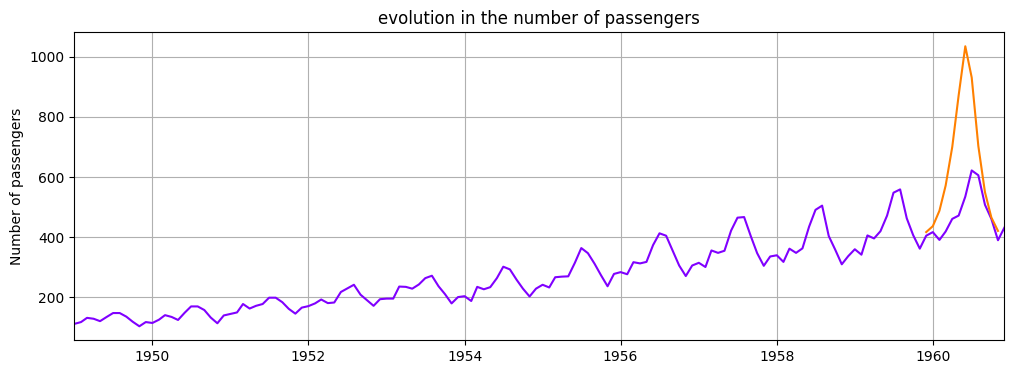

Epoch:  7 Loss: 0.00802826


<Figure size 1000x300 with 0 Axes>

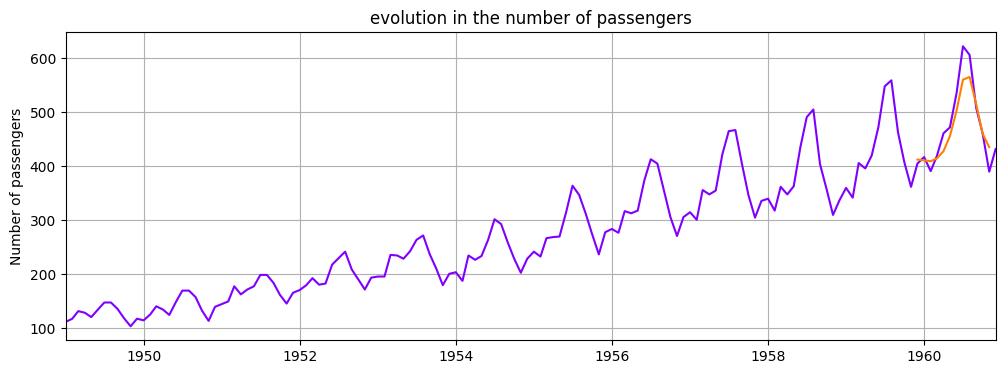

Epoch:  8 Loss: 0.00013153


<Figure size 1000x300 with 0 Axes>

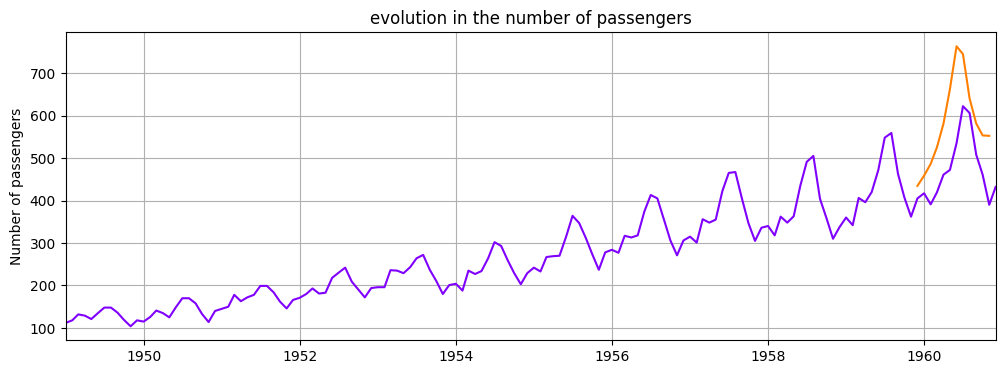

Epoch:  9 Loss: 0.00182493


<Figure size 1000x300 with 0 Axes>

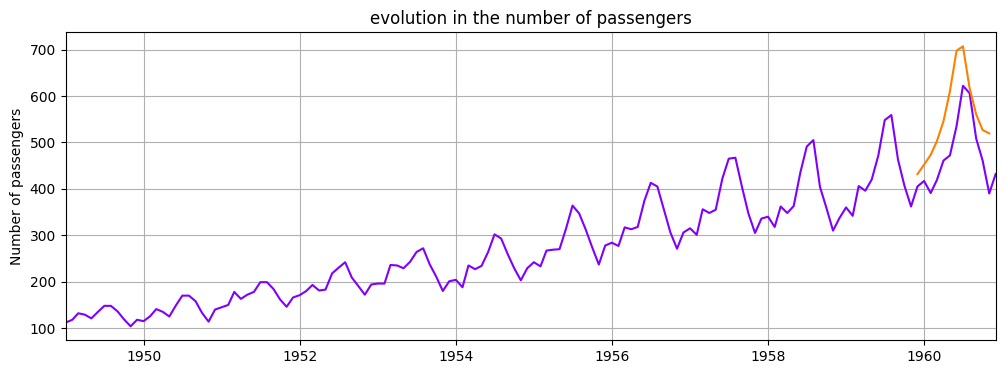

Epoch: 10 Loss: 0.00557297


<Figure size 1000x300 with 0 Axes>

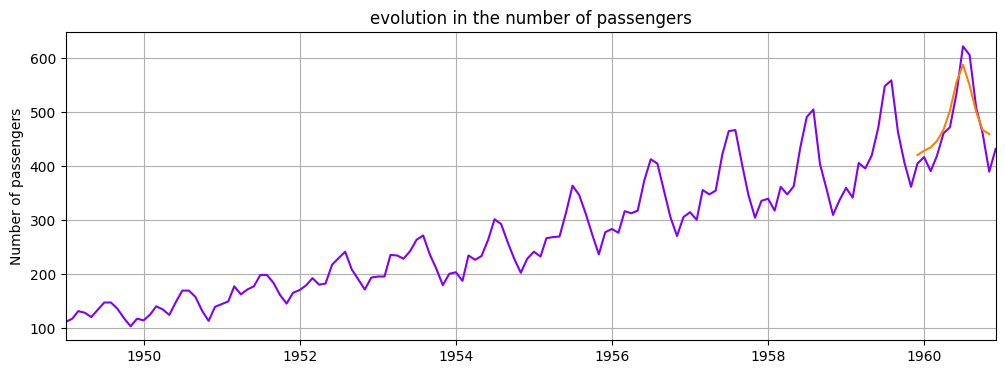

Epoch: 11 Loss: 0.00957130


<Figure size 1000x300 with 0 Axes>

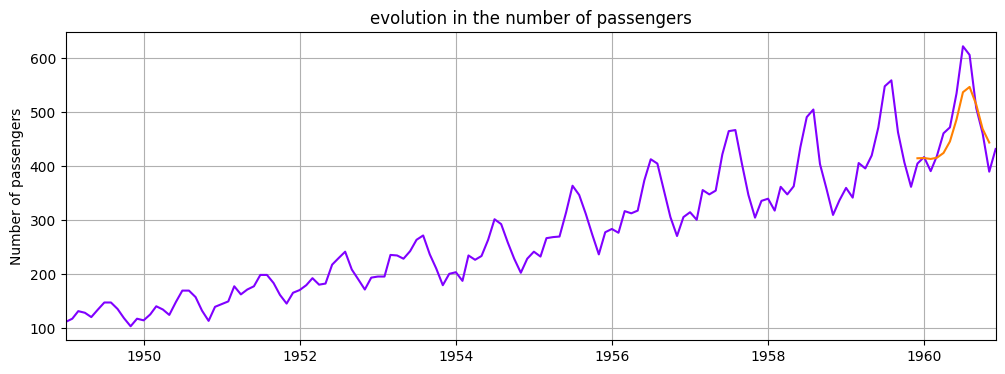

Epoch: 12 Loss: 0.01258906


<Figure size 1000x300 with 0 Axes>

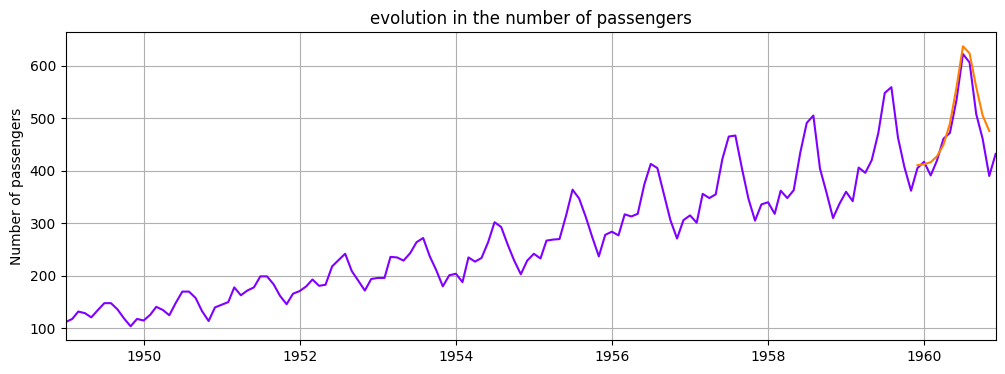

Epoch: 13 Loss: 0.00792710


<Figure size 1000x300 with 0 Axes>

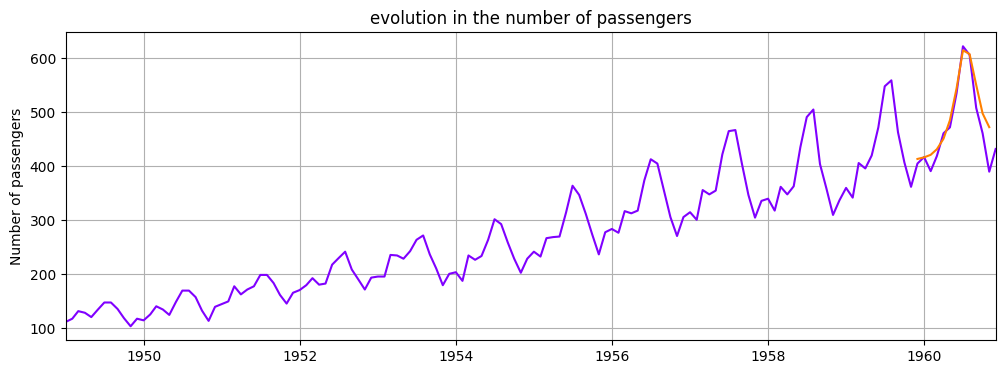

Epoch: 14 Loss: 0.00749846


<Figure size 1000x300 with 0 Axes>

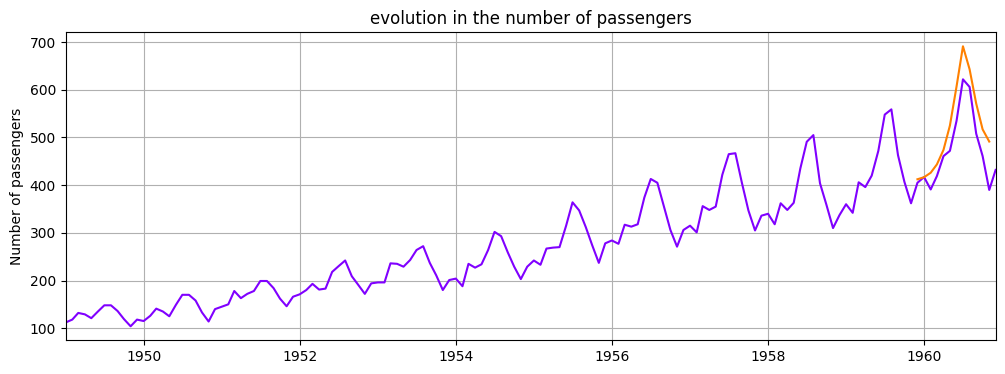

Epoch: 15 Loss: 0.00284976


<Figure size 1000x300 with 0 Axes>

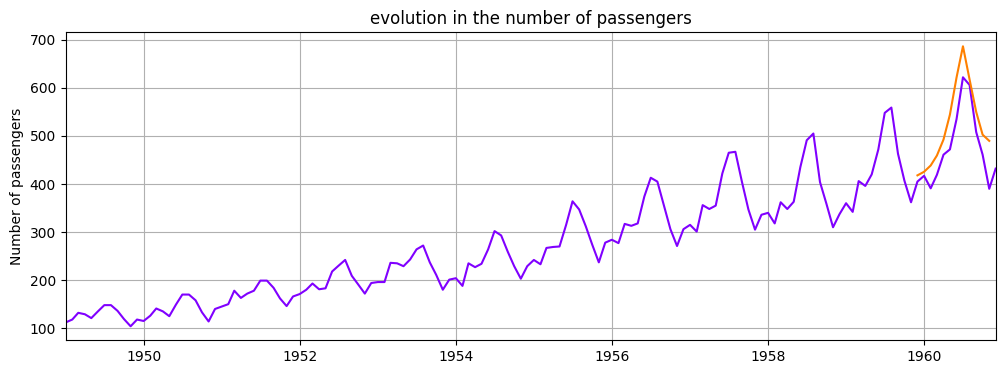

Epoch: 16 Loss: 0.00114112


<Figure size 1000x300 with 0 Axes>

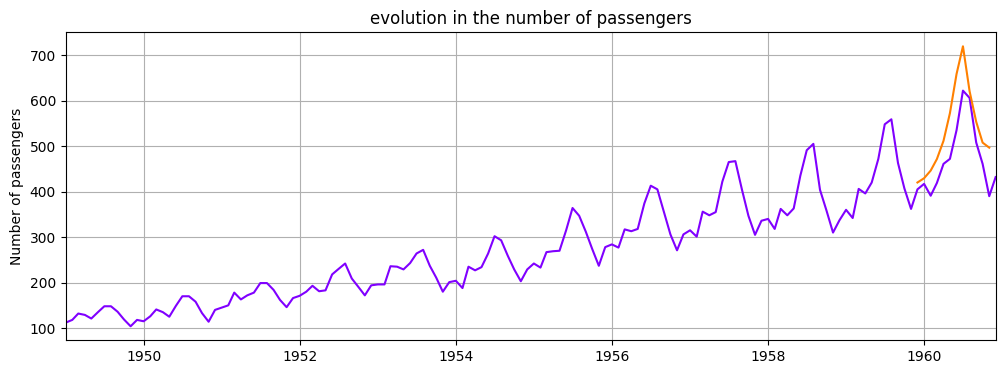

Epoch: 17 Loss: 0.00019012


<Figure size 1000x300 with 0 Axes>

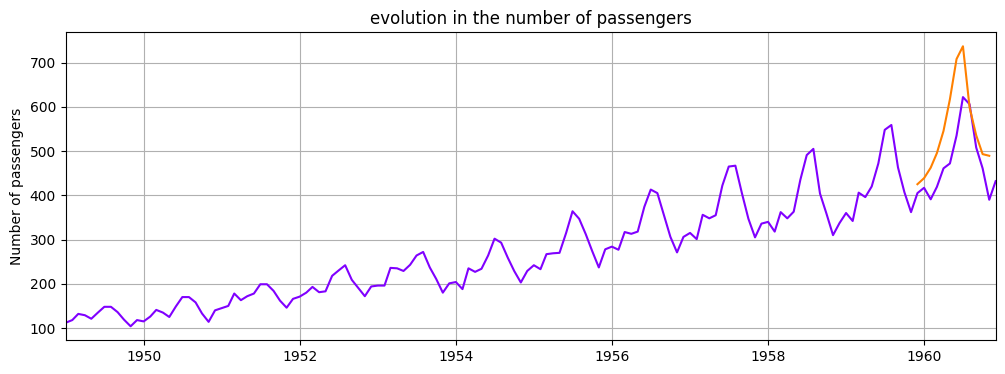

Epoch: 18 Loss: 0.00003554


<Figure size 1000x300 with 0 Axes>

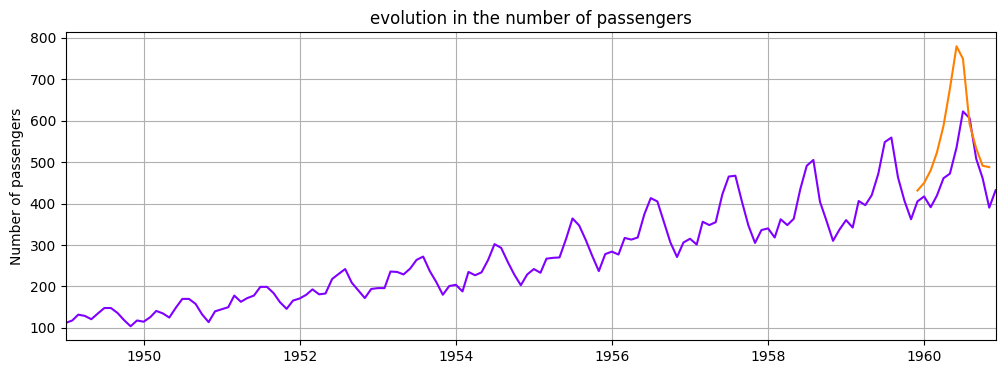

Epoch: 19 Loss: 0.00647551


<Figure size 1000x300 with 0 Axes>

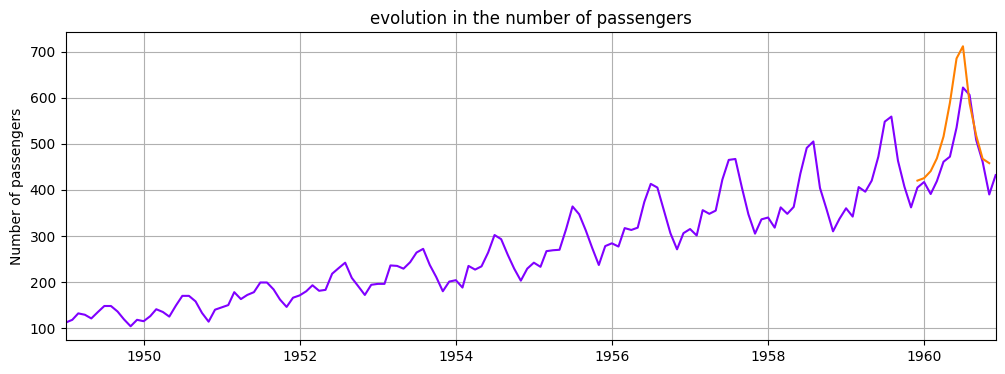

Epoch: 20 Loss: 0.01879310


<Figure size 1000x300 with 0 Axes>

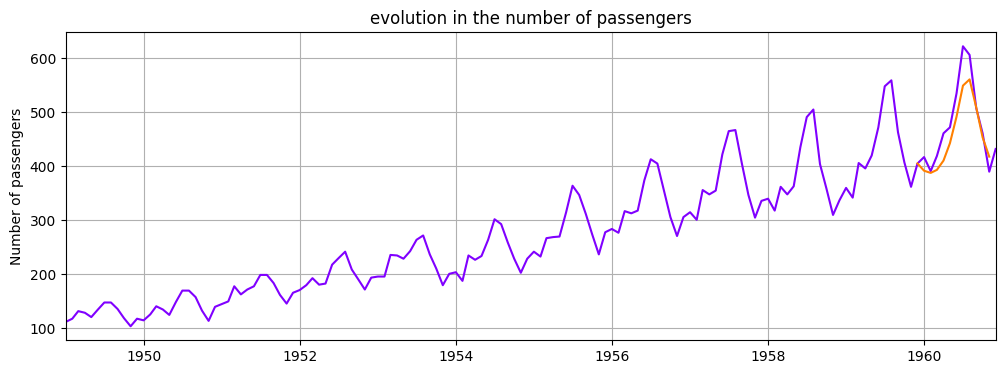

Epoch: 21 Loss: 0.00835140


<Figure size 1000x300 with 0 Axes>

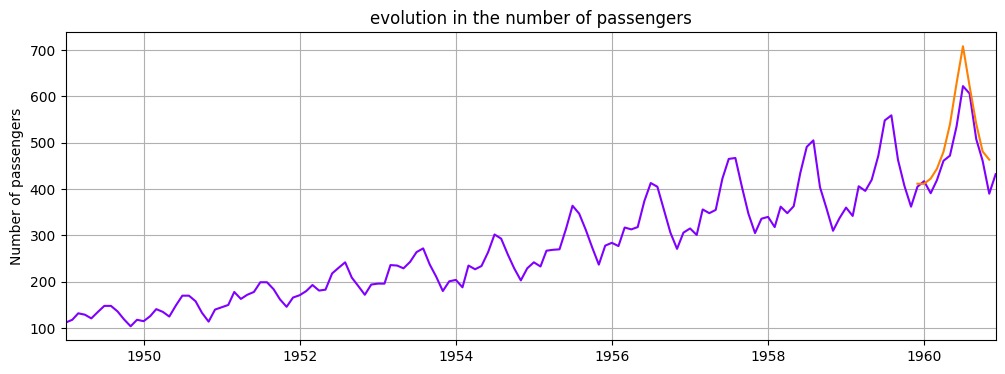

Epoch: 22 Loss: 0.00121408


<Figure size 1000x300 with 0 Axes>

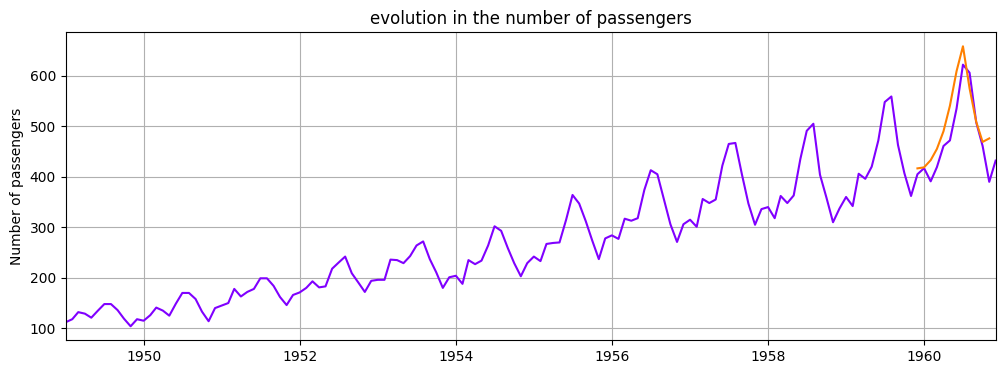

Epoch: 23 Loss: 0.00258179


<Figure size 1000x300 with 0 Axes>

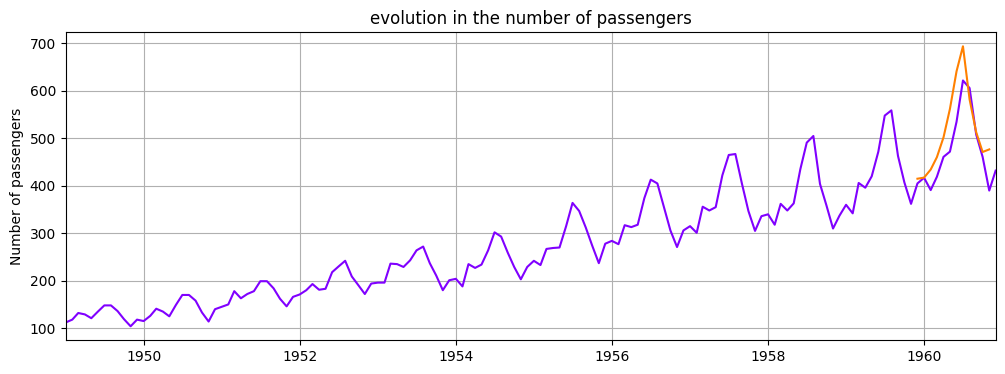

Epoch: 24 Loss: 0.00386020


<Figure size 1000x300 with 0 Axes>

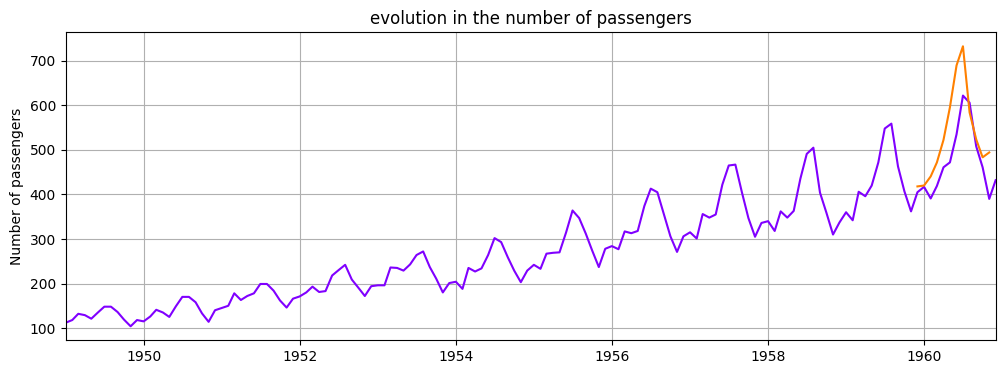

Epoch: 25 Loss: 0.00521126


<Figure size 1000x300 with 0 Axes>

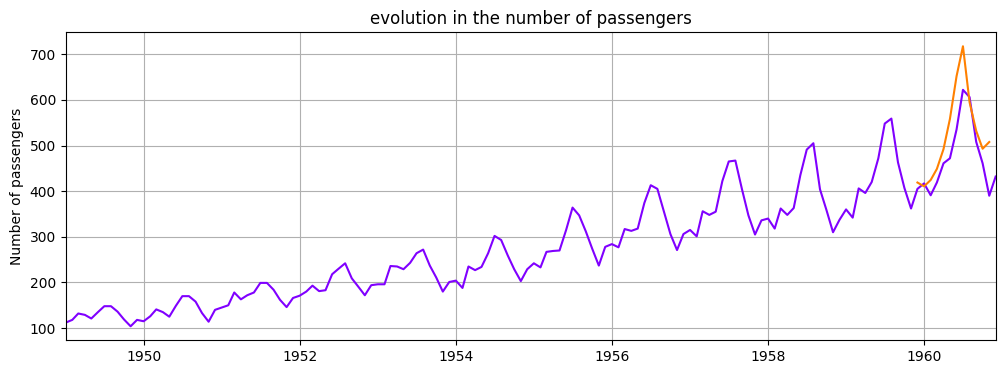

Epoch: 26 Loss: 0.00255448


<Figure size 1000x300 with 0 Axes>

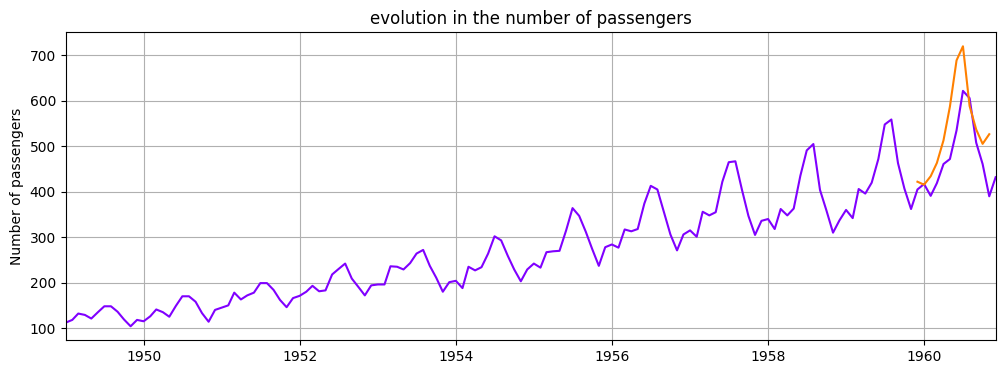

Epoch: 27 Loss: 0.00073355


<Figure size 1000x300 with 0 Axes>

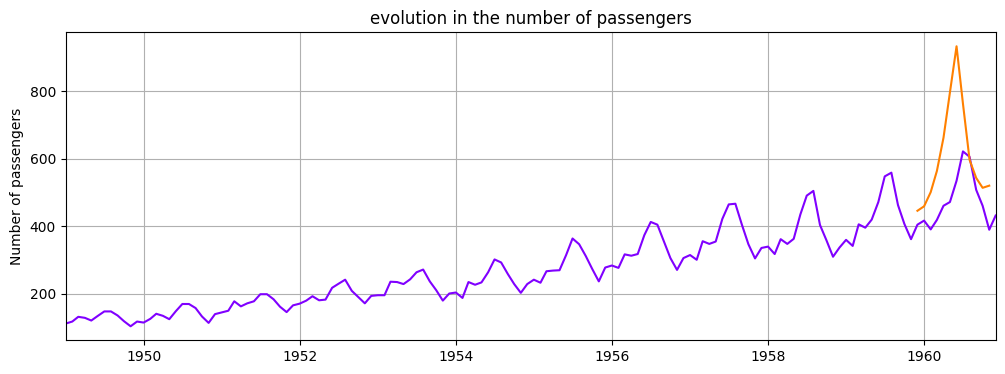

Epoch: 28 Loss: 0.01224712


<Figure size 1000x300 with 0 Axes>

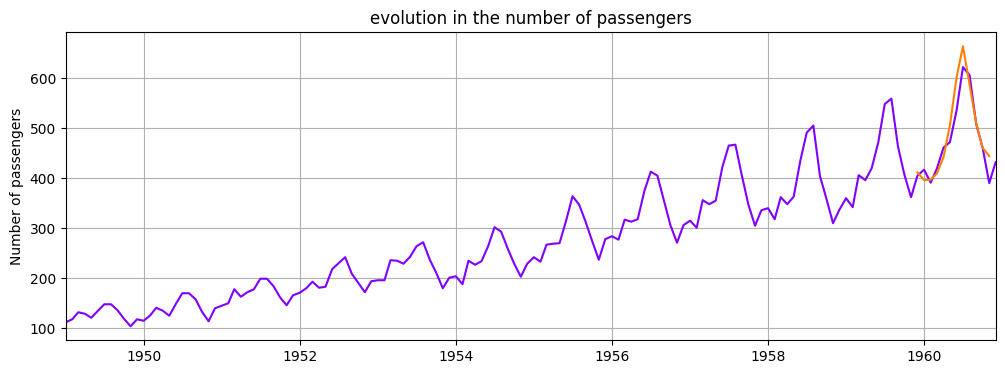

Epoch: 29 Loss: 0.00931508


<Figure size 1000x300 with 0 Axes>

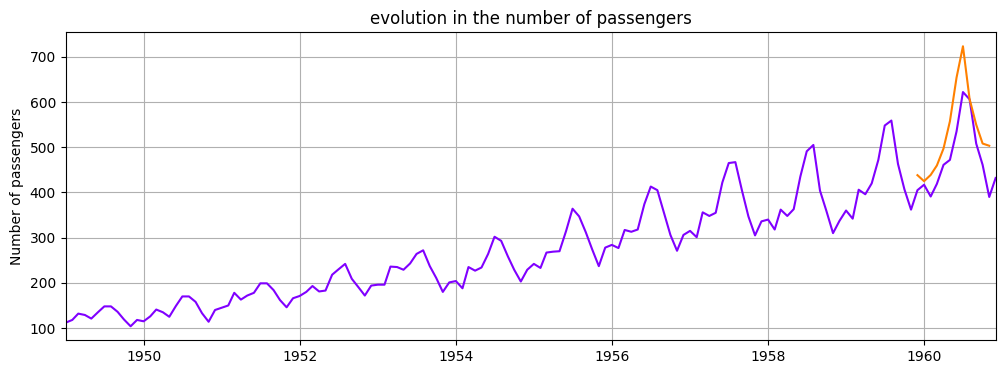

Epoch: 30 Loss: 0.00373728


<Figure size 1000x300 with 0 Axes>

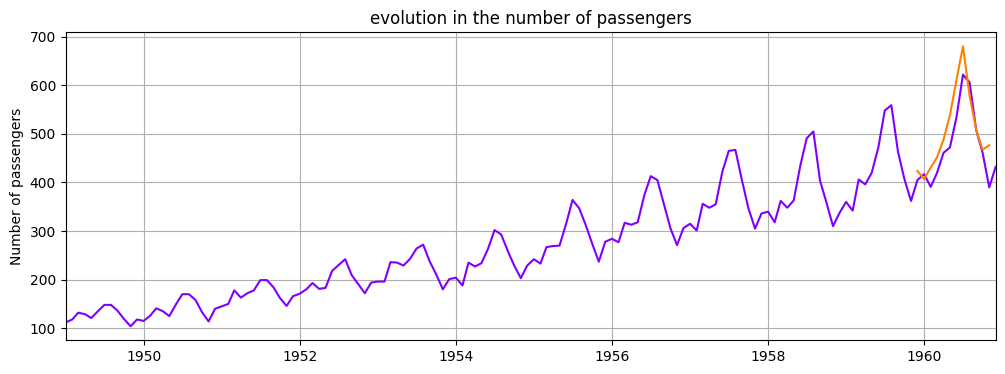

Epoch: 31 Loss: 0.00097974


<Figure size 1000x300 with 0 Axes>

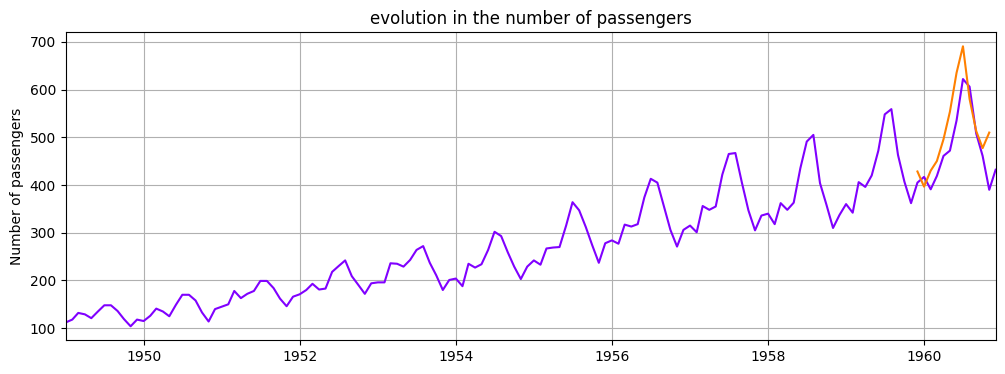

Epoch: 32 Loss: 0.00668984


<Figure size 1000x300 with 0 Axes>

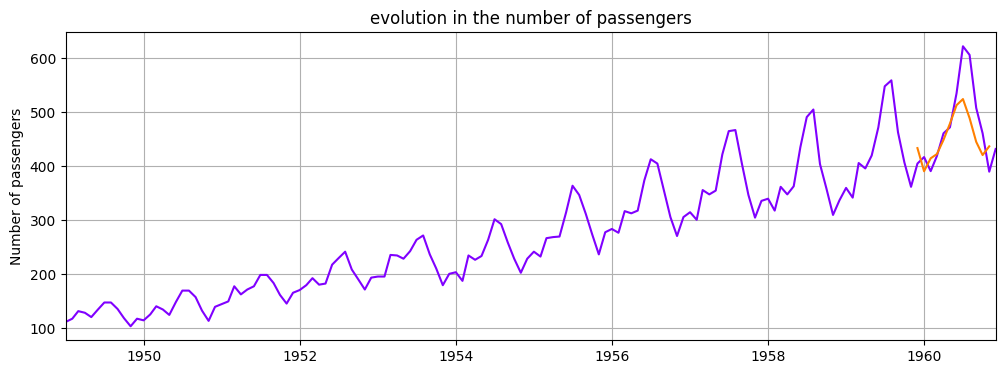

Epoch: 33 Loss: 0.00073948


<Figure size 1000x300 with 0 Axes>

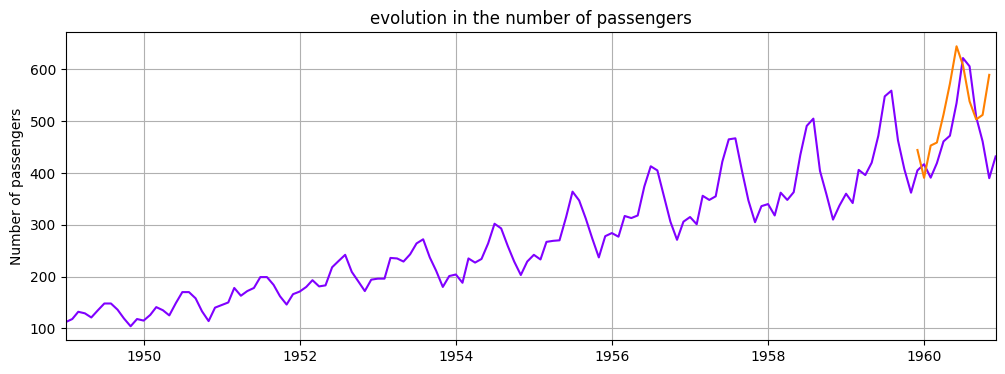

Epoch: 34 Loss: 0.13458274


<Figure size 1000x300 with 0 Axes>

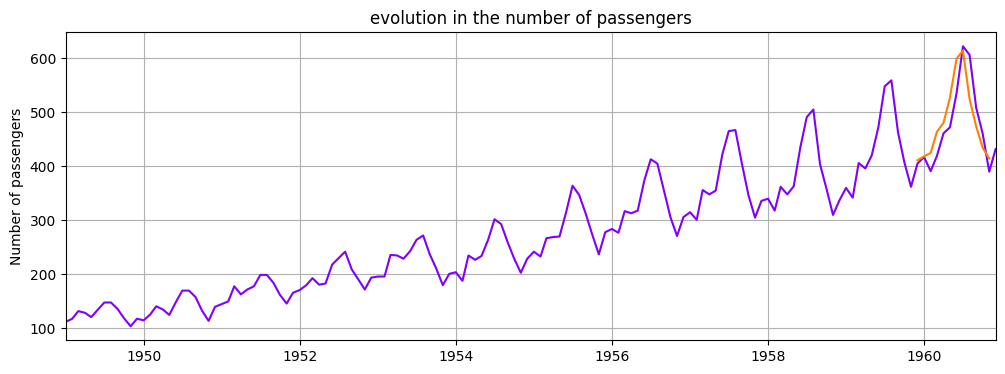

Epoch: 35 Loss: 0.00165019


<Figure size 1000x300 with 0 Axes>

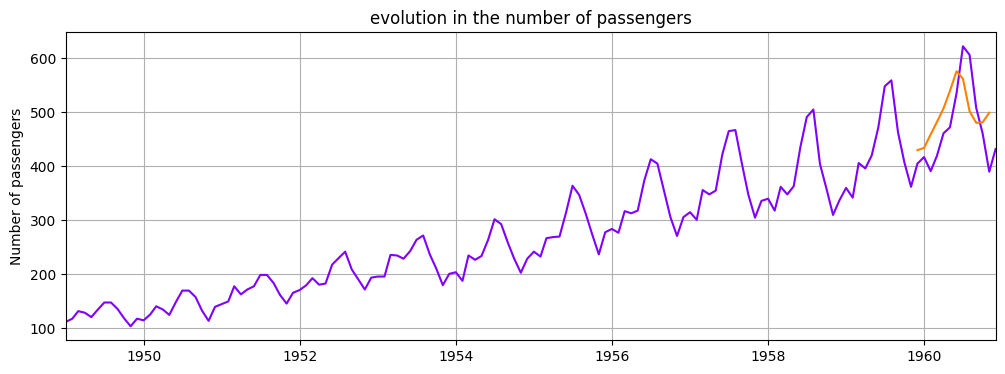

Epoch: 36 Loss: 0.00022527


<Figure size 1000x300 with 0 Axes>

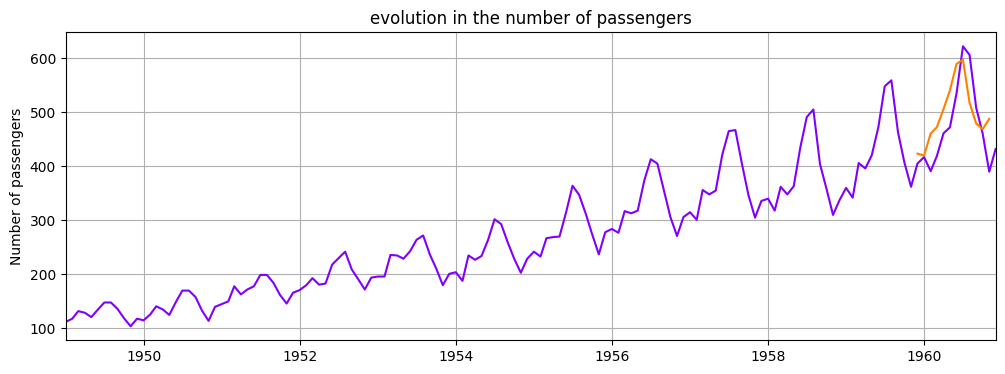

Epoch: 37 Loss: 0.00195111


<Figure size 1000x300 with 0 Axes>

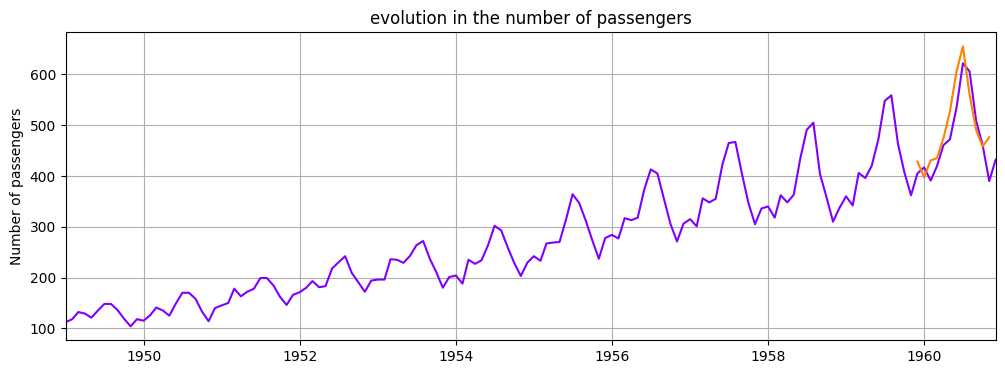

Epoch: 38 Loss: 0.00008505


<Figure size 1000x300 with 0 Axes>

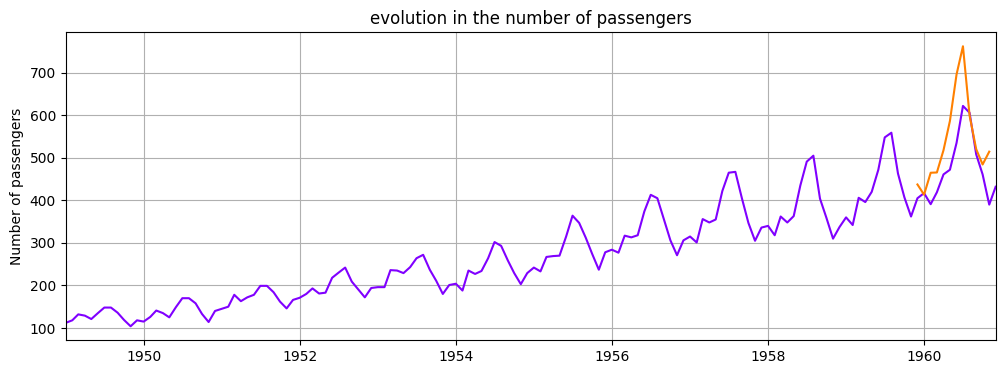

Epoch: 39 Loss: 0.00030750


<Figure size 1000x300 with 0 Axes>

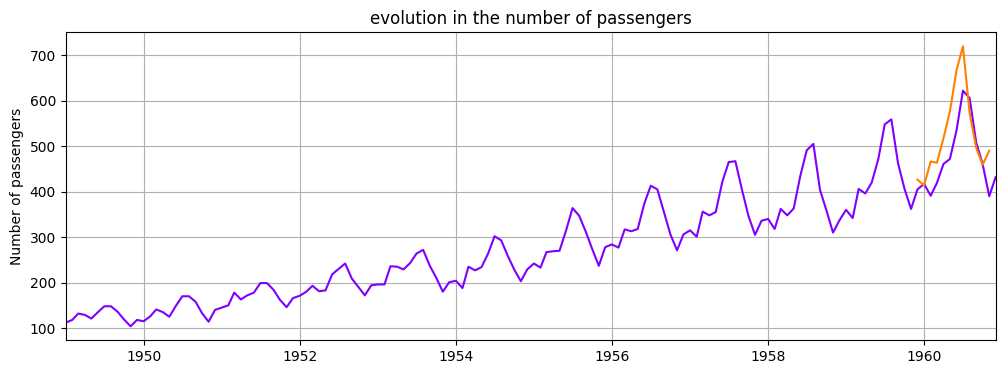

Epoch: 40 Loss: 0.00000219


<Figure size 1000x300 with 0 Axes>

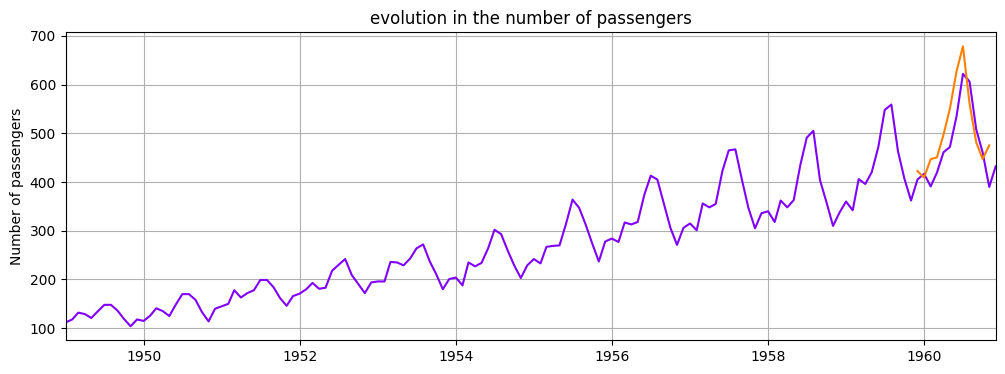

Epoch: 41 Loss: 0.00273273


<Figure size 1000x300 with 0 Axes>

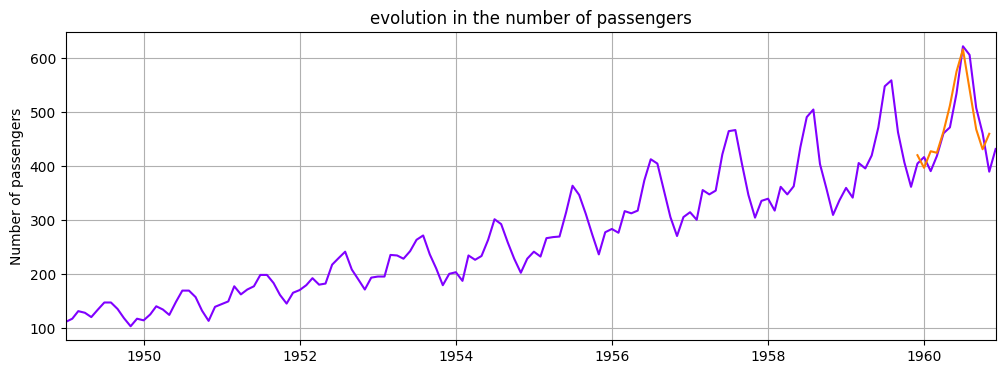

Epoch: 42 Loss: 0.00024517


<Figure size 1000x300 with 0 Axes>

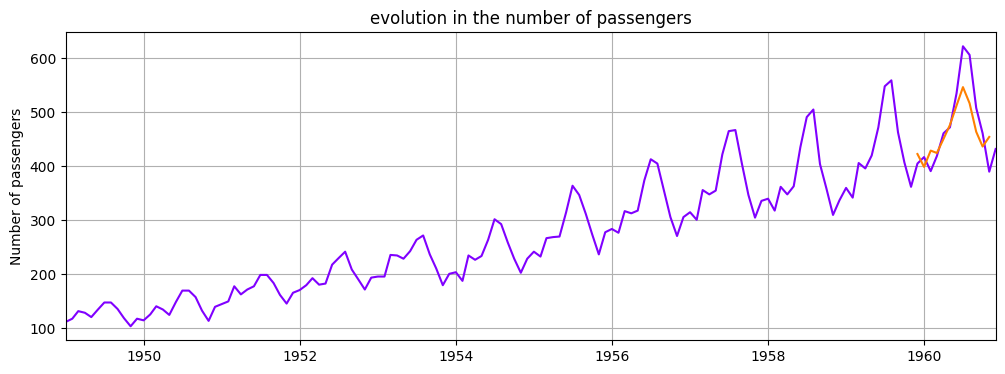

Epoch: 43 Loss: 0.00763576


<Figure size 1000x300 with 0 Axes>

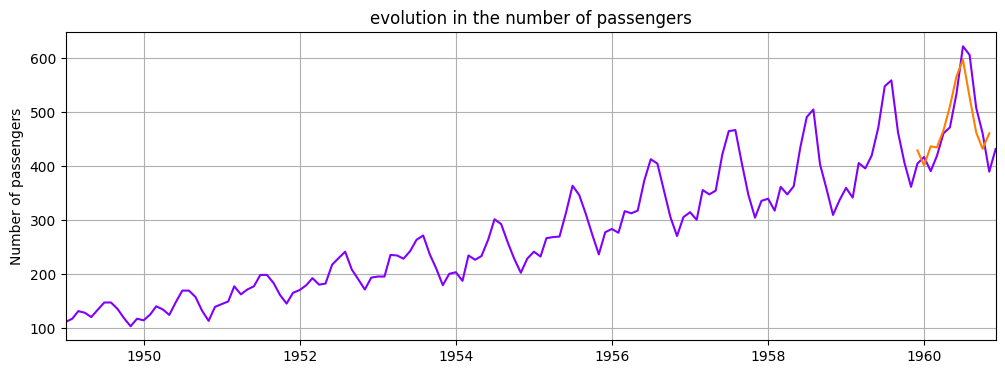

Epoch: 44 Loss: 0.00224308


<Figure size 1000x300 with 0 Axes>

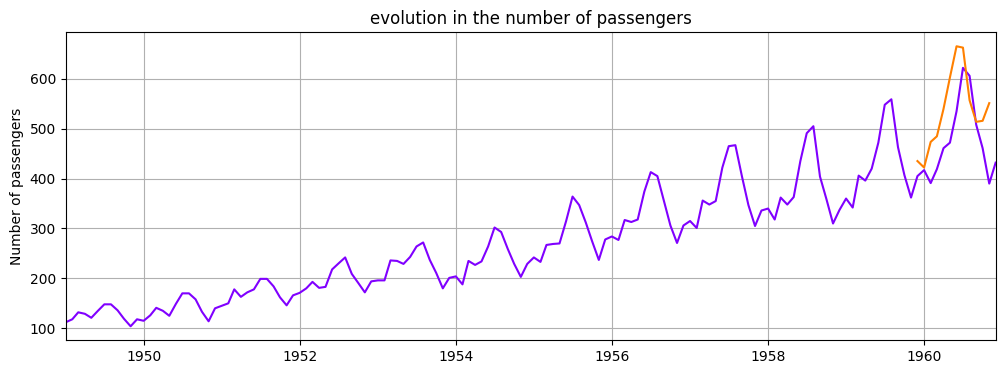

Epoch: 45 Loss: 0.00919305


<Figure size 1000x300 with 0 Axes>

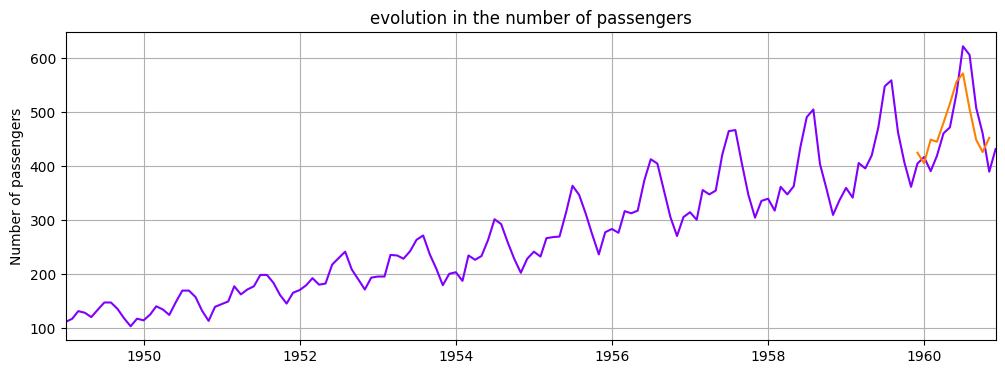

Epoch: 46 Loss: 0.00744848


<Figure size 1000x300 with 0 Axes>

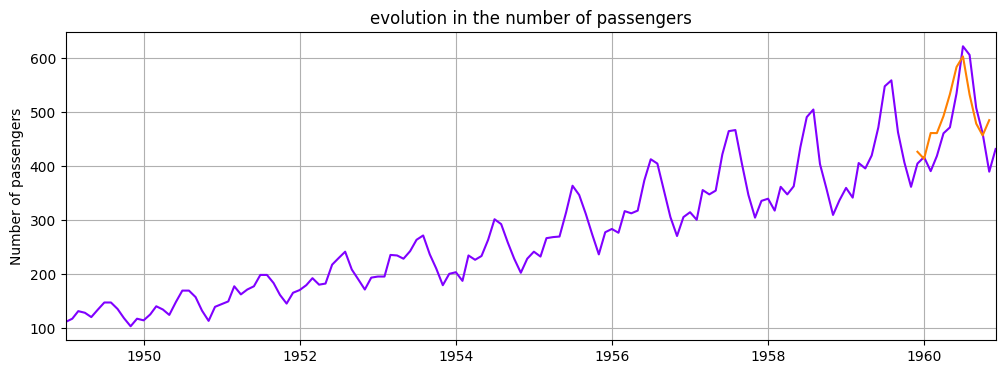

Epoch: 47 Loss: 0.00008529


<Figure size 1000x300 with 0 Axes>

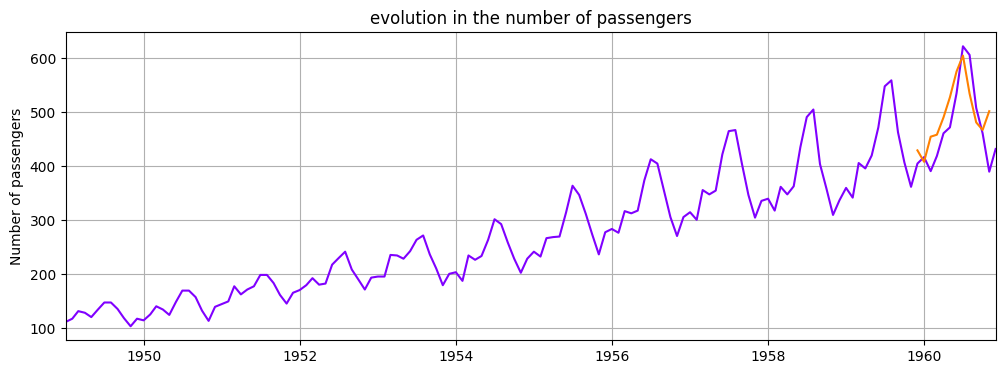

Epoch: 48 Loss: 0.00152439


<Figure size 1000x300 with 0 Axes>

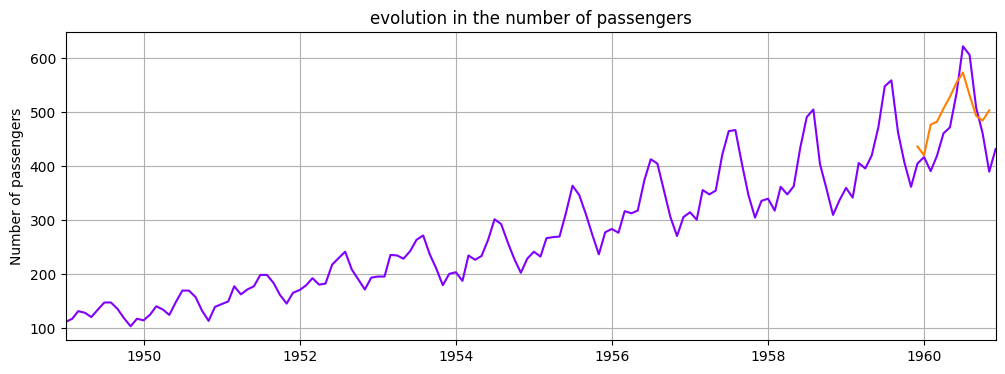

Epoch: 49 Loss: 0.00039195


<Figure size 1000x300 with 0 Axes>

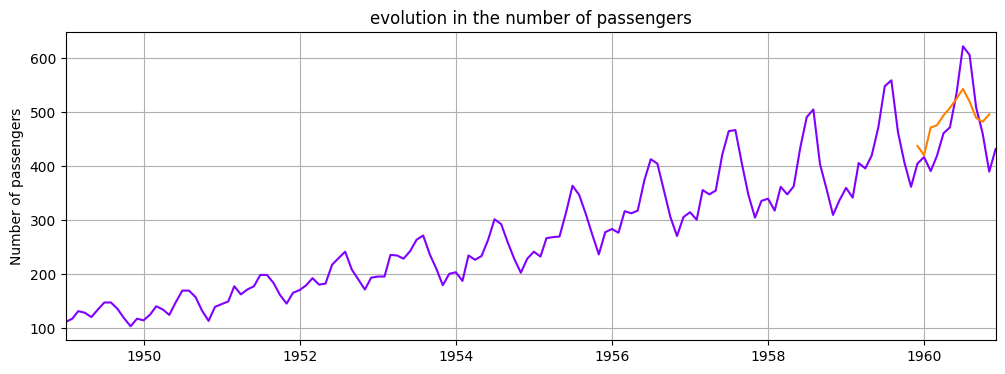

Epoch: 50 Loss: 0.00106417


<Figure size 1000x300 with 0 Axes>

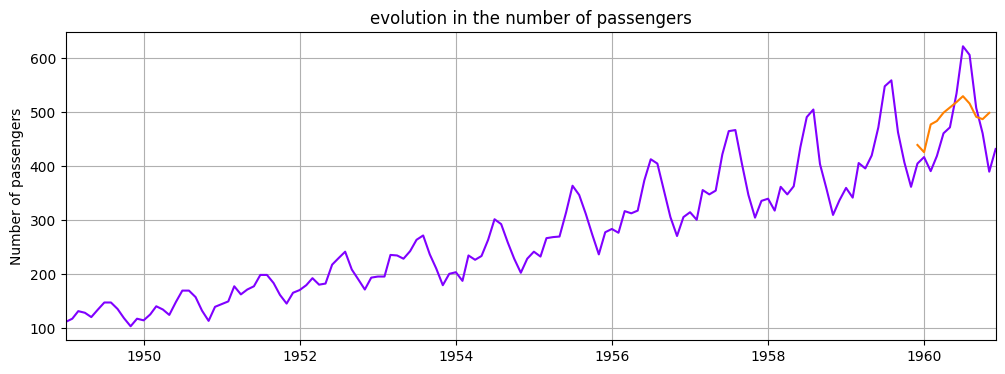

Epoch: 51 Loss: 0.00170673


<Figure size 1000x300 with 0 Axes>

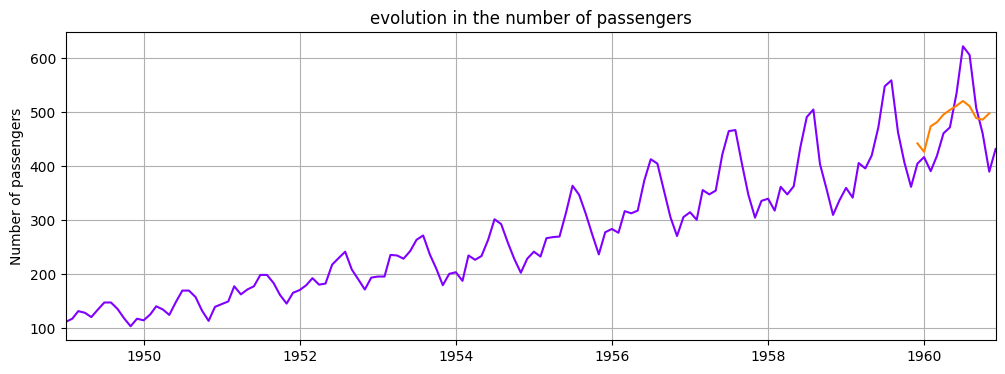

Epoch: 52 Loss: 0.00260882


<Figure size 1000x300 with 0 Axes>

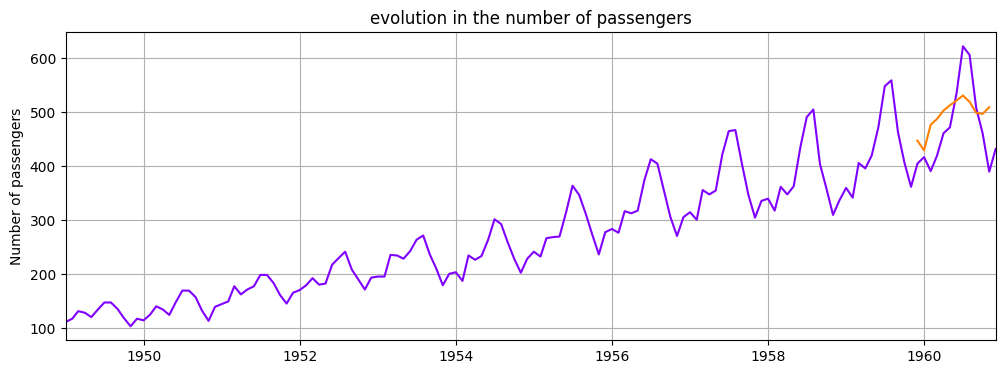

Epoch: 53 Loss: 0.00114358


<Figure size 1000x300 with 0 Axes>

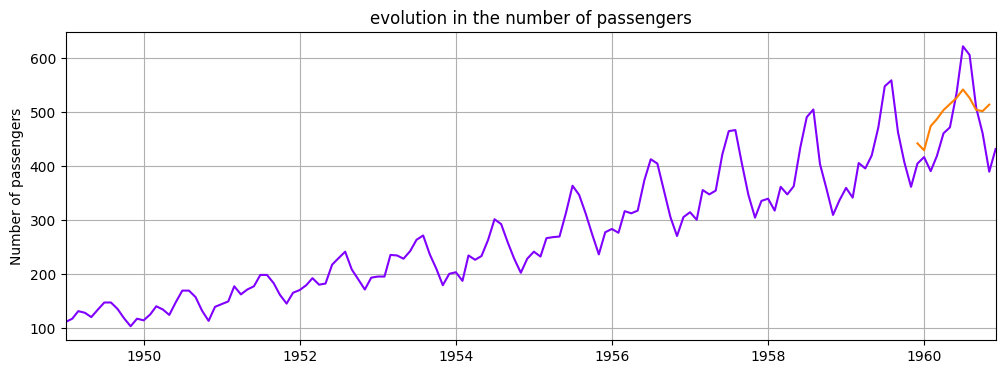

Epoch: 54 Loss: 0.00034991


<Figure size 1000x300 with 0 Axes>

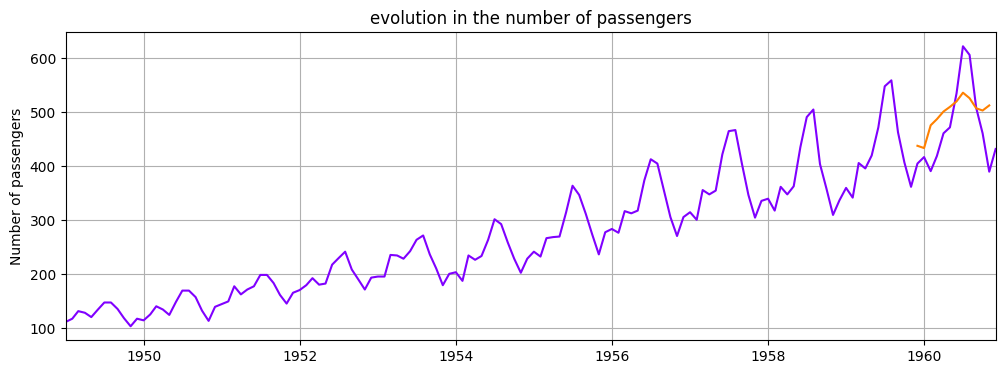

Epoch: 55 Loss: 0.00555442


<Figure size 1000x300 with 0 Axes>

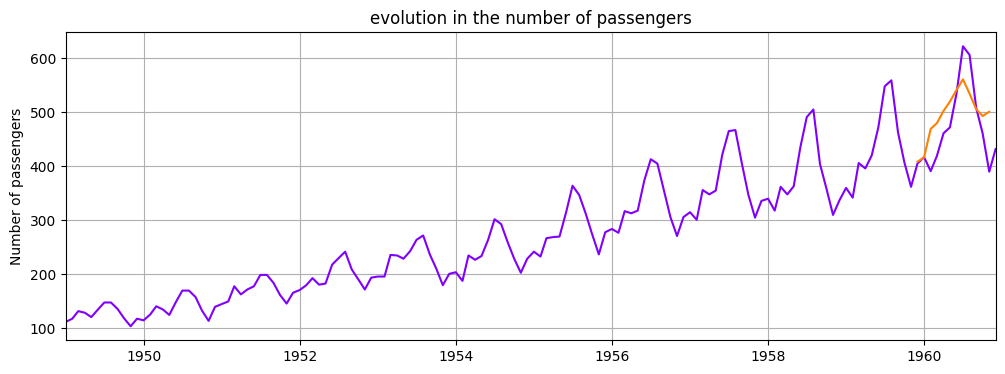

Epoch: 56 Loss: 0.00000010


<Figure size 1000x300 with 0 Axes>

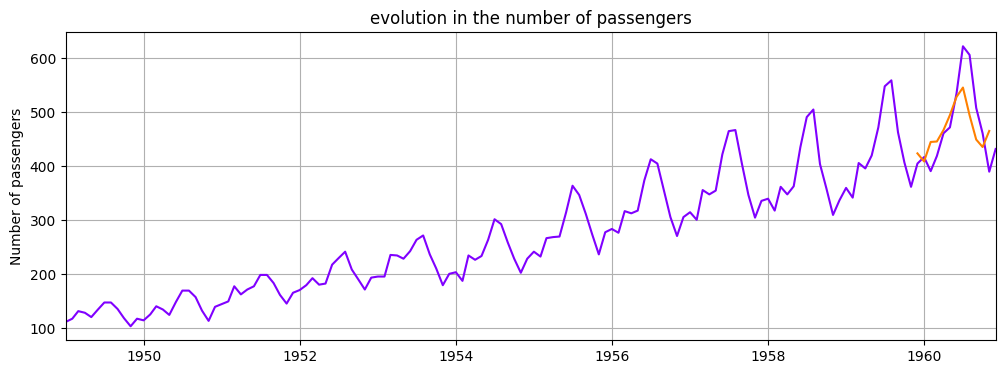

Epoch: 57 Loss: 0.00056233


<Figure size 1000x300 with 0 Axes>

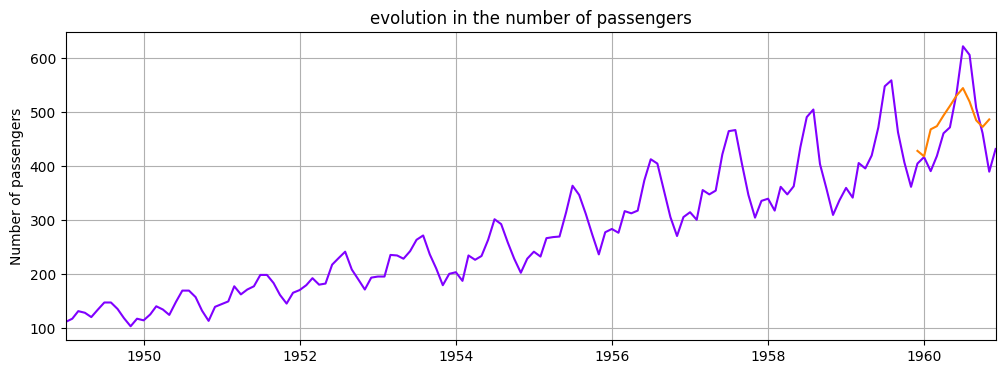

Epoch: 58 Loss: 0.00022408


<Figure size 1000x300 with 0 Axes>

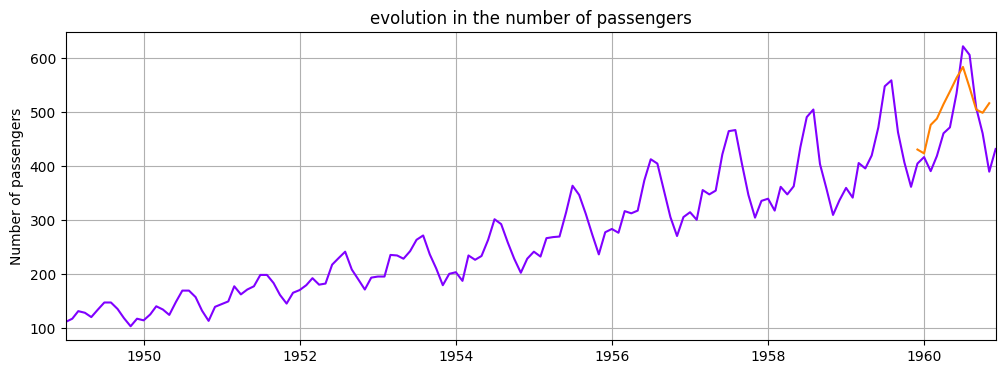

Epoch: 59 Loss: 0.00048556


<Figure size 1000x300 with 0 Axes>

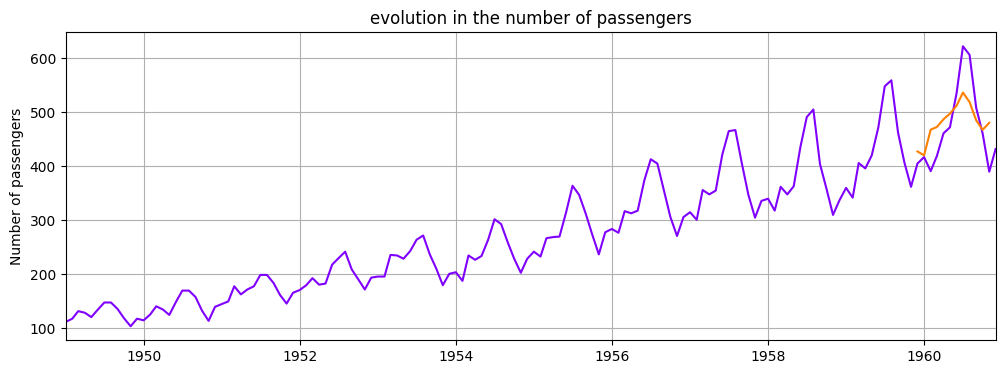

Epoch: 60 Loss: 0.00663054


<Figure size 1000x300 with 0 Axes>

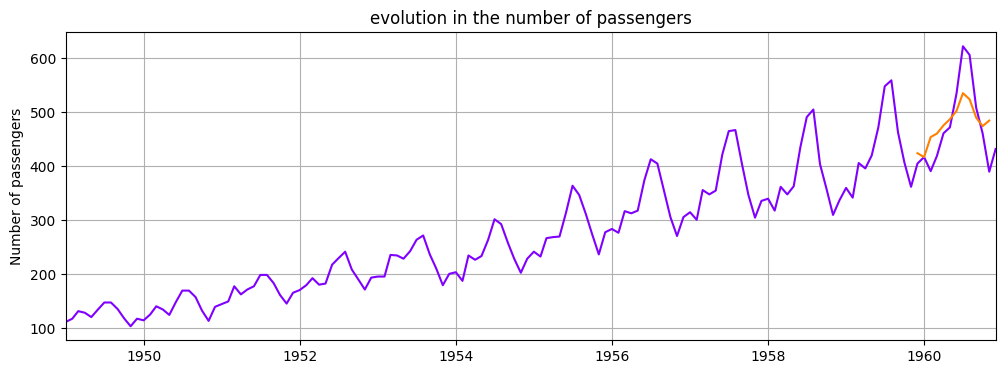

Epoch: 61 Loss: 0.01338340


<Figure size 1000x300 with 0 Axes>

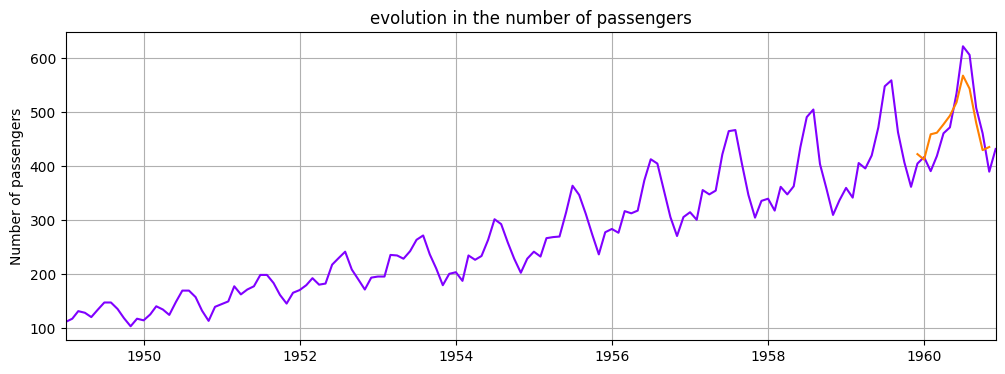

Epoch: 62 Loss: 0.00800248


<Figure size 1000x300 with 0 Axes>

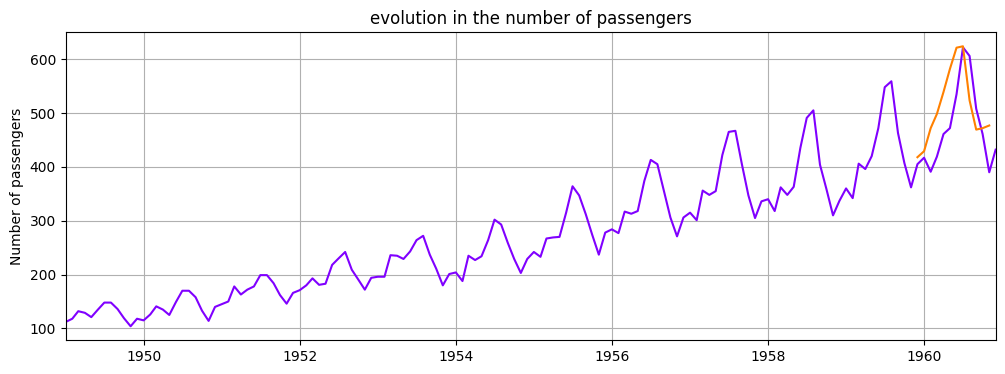

Epoch: 63 Loss: 0.04037825


<Figure size 1000x300 with 0 Axes>

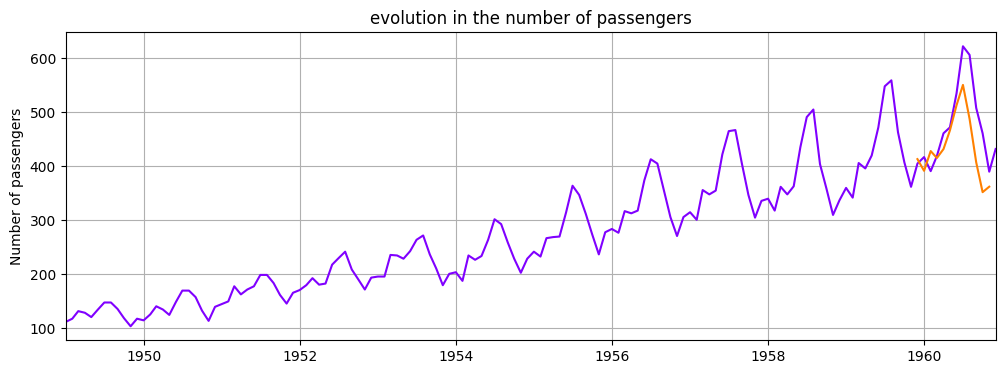

Epoch: 64 Loss: 0.00464303


<Figure size 1000x300 with 0 Axes>

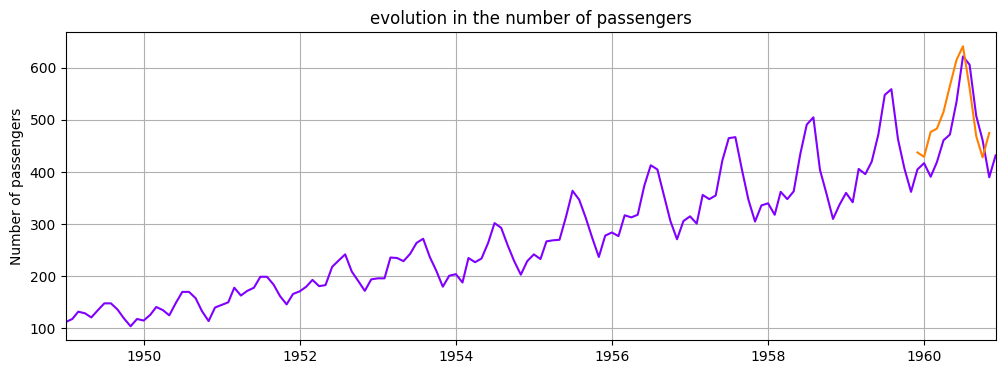

Epoch: 65 Loss: 0.00857417


<Figure size 1000x300 with 0 Axes>

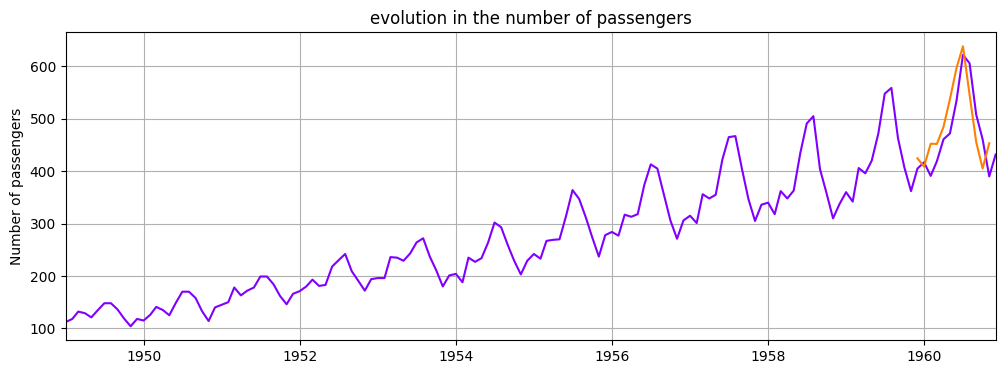

Epoch: 66 Loss: 0.00544815


<Figure size 1000x300 with 0 Axes>

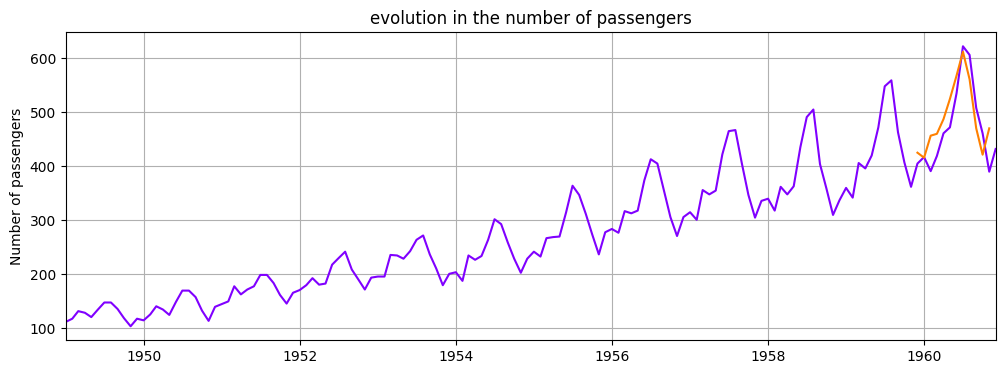

Epoch: 67 Loss: 0.00183268


<Figure size 1000x300 with 0 Axes>

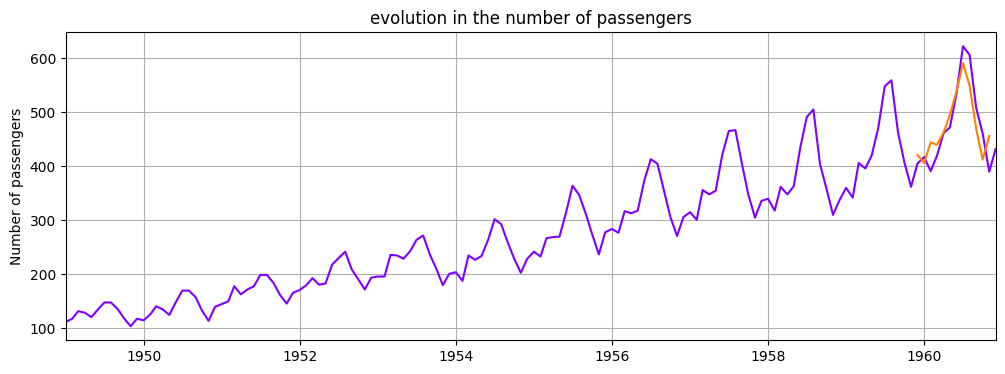

Epoch: 68 Loss: 0.00013729


<Figure size 1000x300 with 0 Axes>

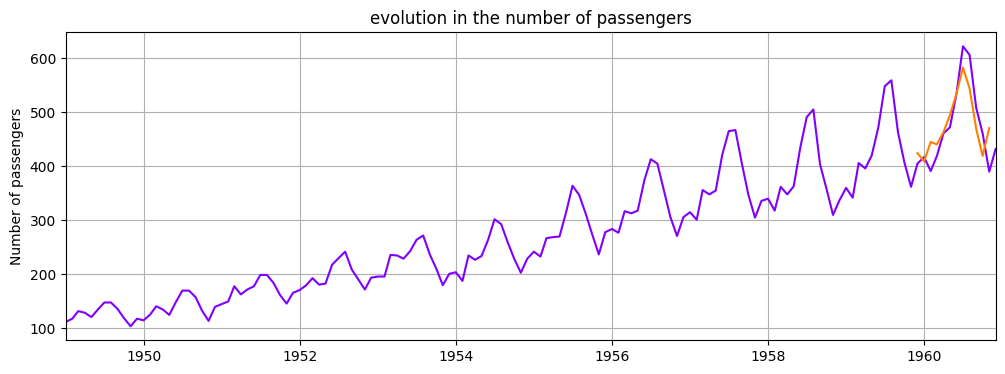

Epoch: 69 Loss: 0.00137152


<Figure size 1000x300 with 0 Axes>

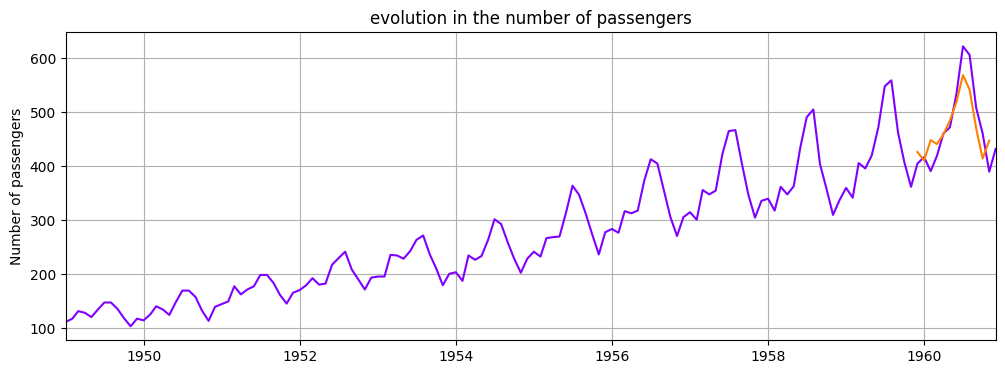

Epoch: 70 Loss: 0.00242233


<Figure size 1000x300 with 0 Axes>

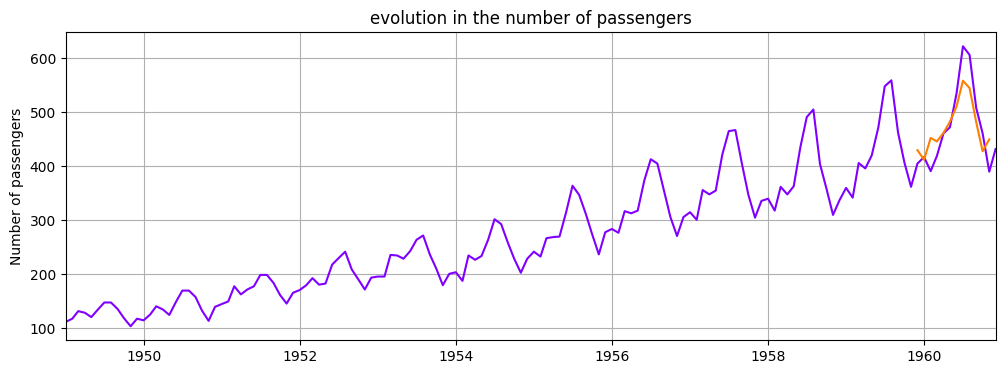

Epoch: 71 Loss: 0.00202531


<Figure size 1000x300 with 0 Axes>

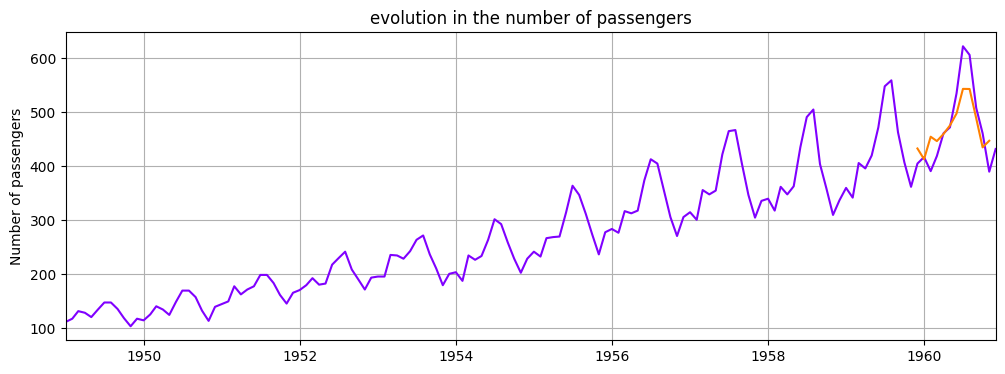

Epoch: 72 Loss: 0.00057168


<Figure size 1000x300 with 0 Axes>

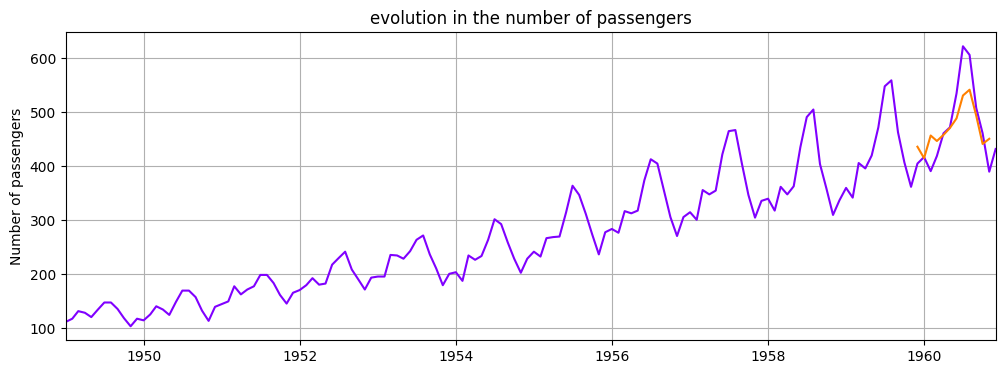

Epoch: 73 Loss: 0.00000867


<Figure size 1000x300 with 0 Axes>

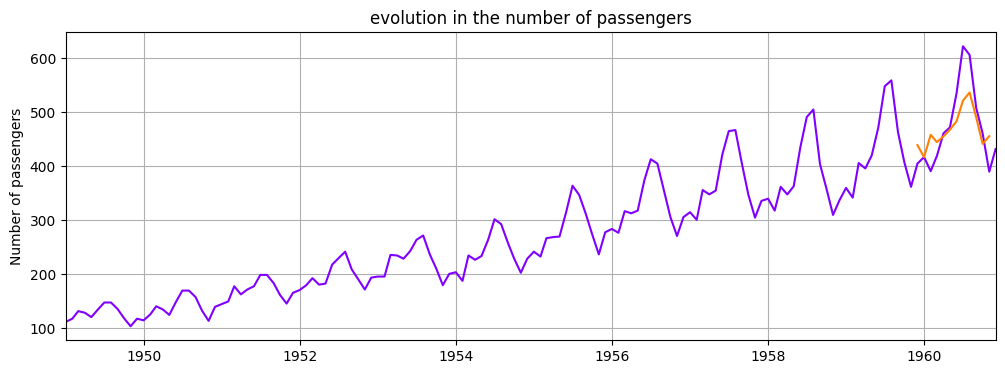

Epoch: 74 Loss: 0.00000015


<Figure size 1000x300 with 0 Axes>

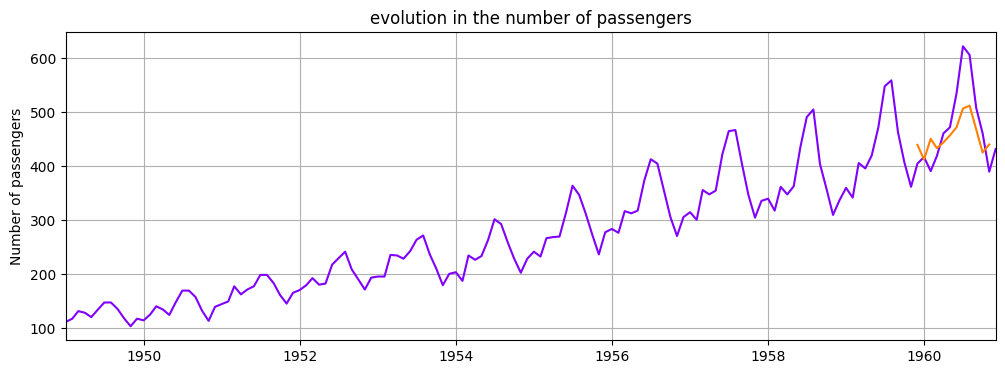

Epoch: 75 Loss: 0.00006054


<Figure size 1000x300 with 0 Axes>

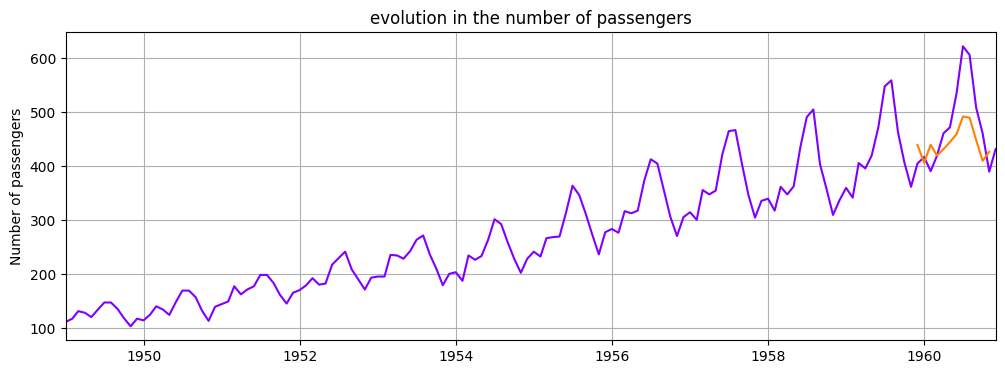

Epoch: 76 Loss: 0.00022699


<Figure size 1000x300 with 0 Axes>

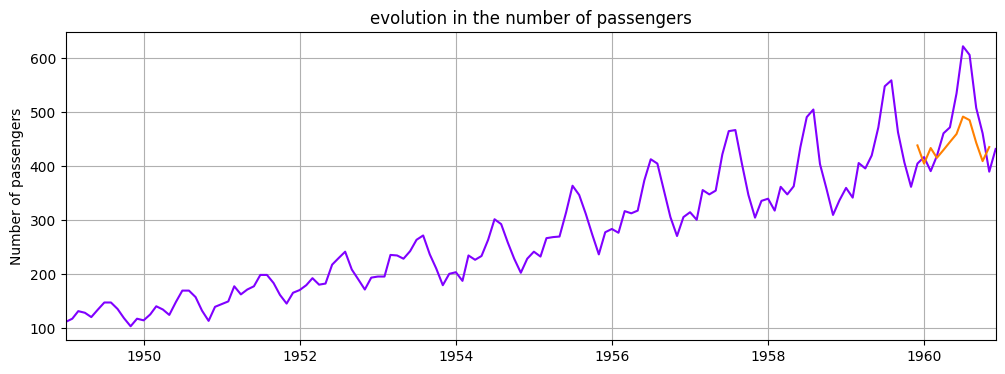

Epoch: 77 Loss: 0.00060547


<Figure size 1000x300 with 0 Axes>

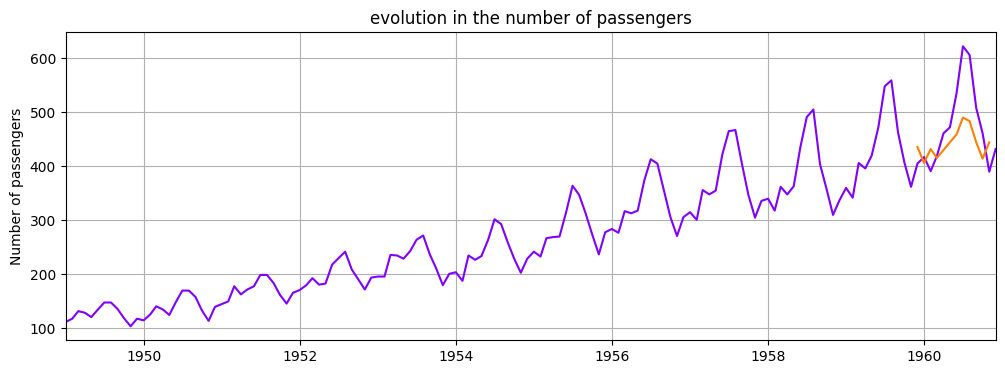

Epoch: 78 Loss: 0.00032806


<Figure size 1000x300 with 0 Axes>

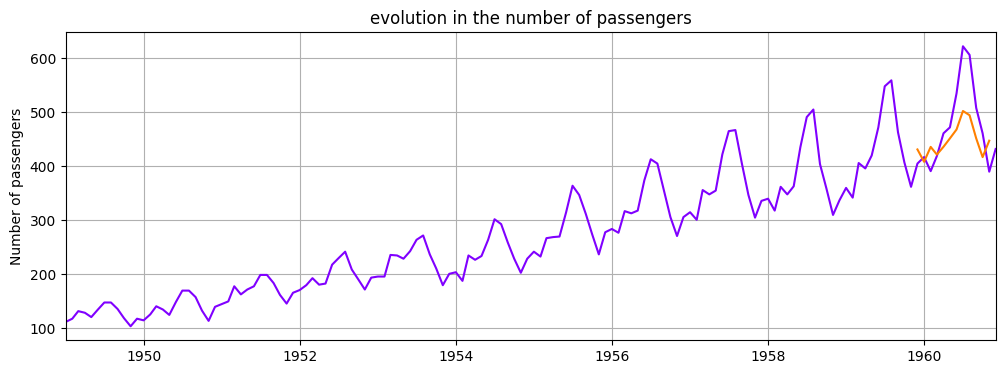

Epoch: 79 Loss: 0.00041173


<Figure size 1000x300 with 0 Axes>

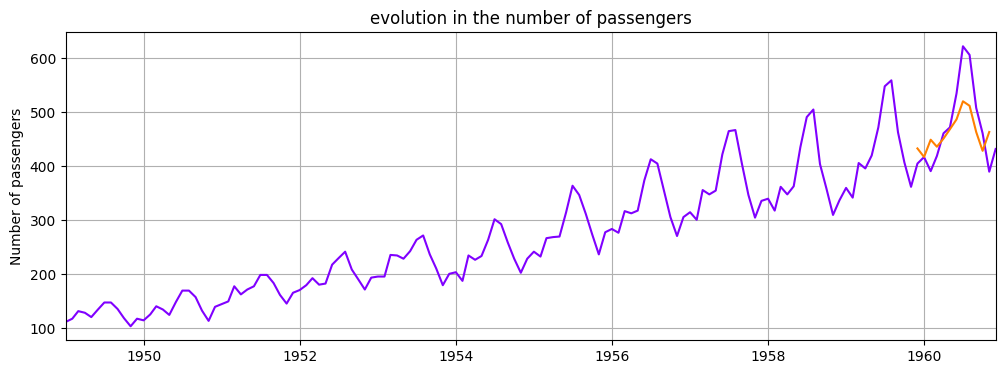

Epoch: 80 Loss: 0.00000153


<Figure size 1000x300 with 0 Axes>

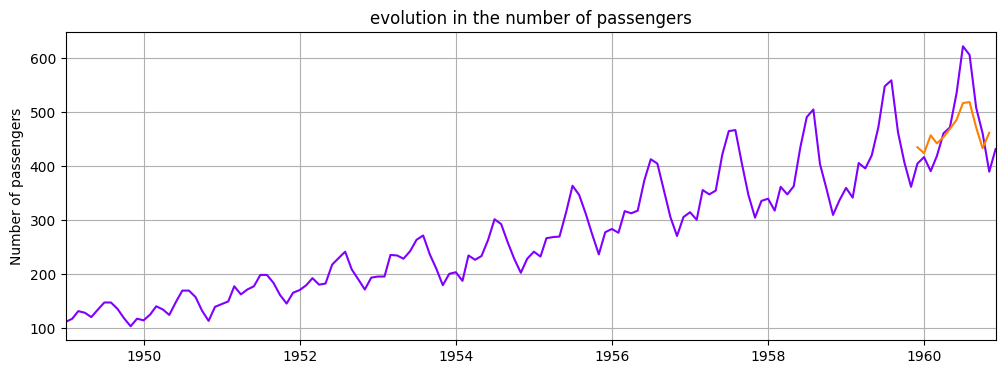

Epoch: 81 Loss: 0.00033697


<Figure size 1000x300 with 0 Axes>

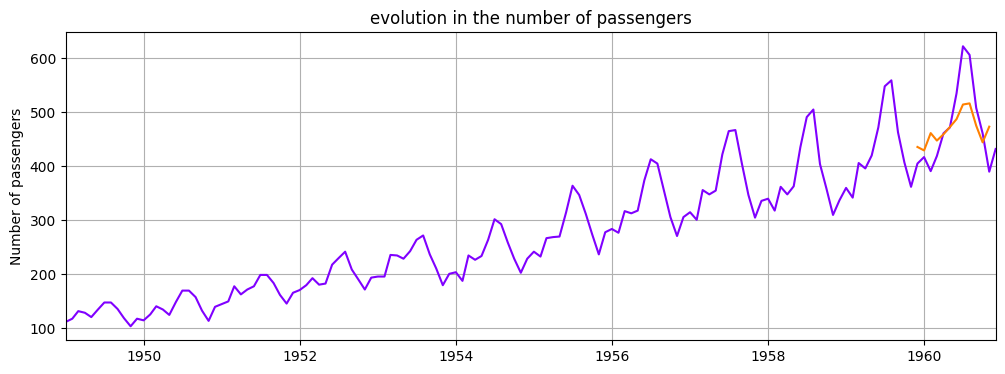

Epoch: 82 Loss: 0.00107142


<Figure size 1000x300 with 0 Axes>

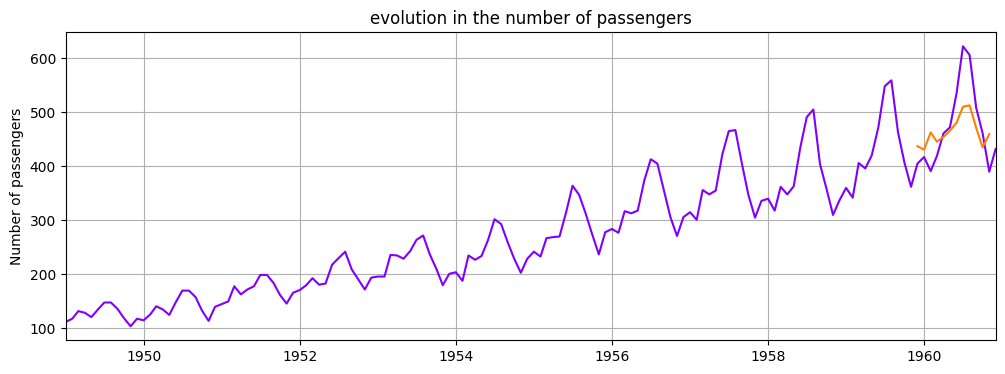

Epoch: 83 Loss: 0.00222869


<Figure size 1000x300 with 0 Axes>

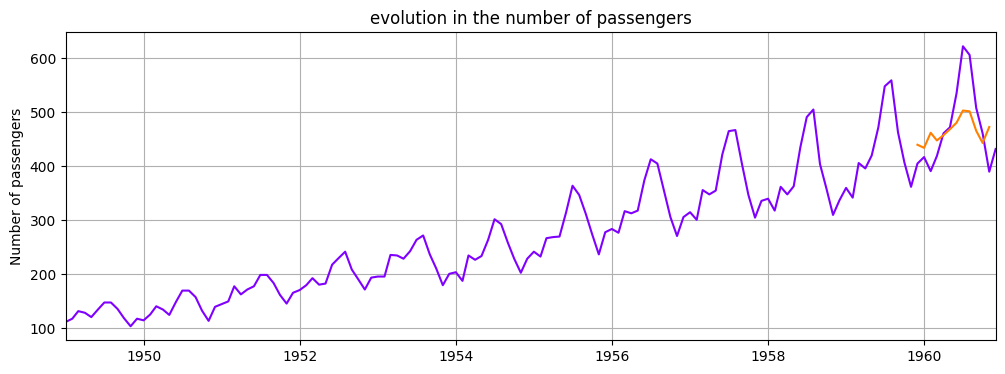

Epoch: 84 Loss: 0.00921696


<Figure size 1000x300 with 0 Axes>

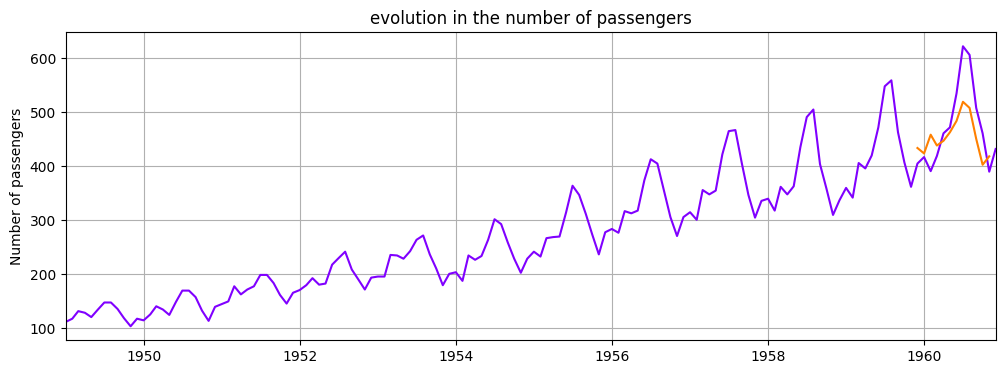

Epoch: 85 Loss: 0.00000012


<Figure size 1000x300 with 0 Axes>

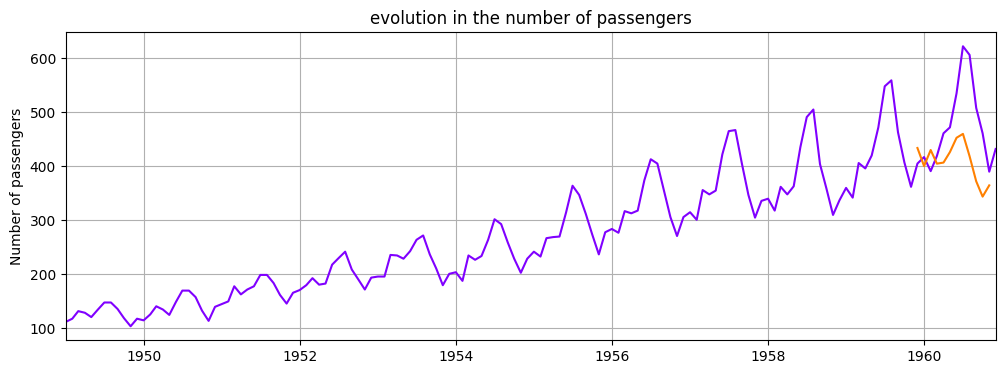

Epoch: 86 Loss: 0.02519444


<Figure size 1000x300 with 0 Axes>

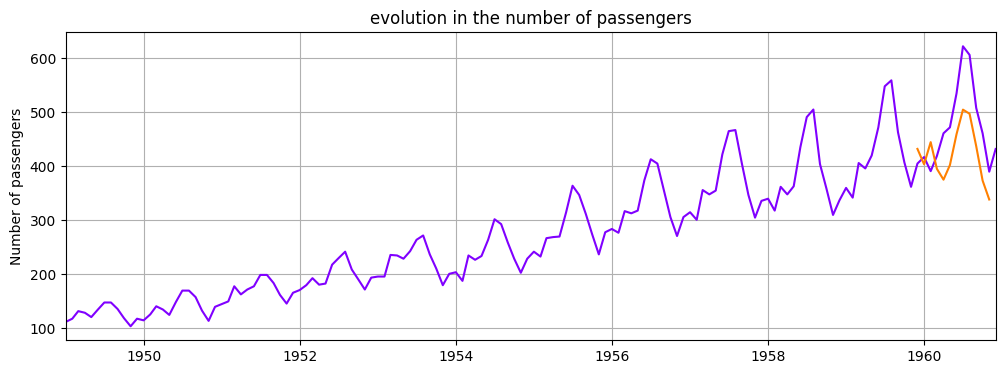

Epoch: 87 Loss: 0.00016945


<Figure size 1000x300 with 0 Axes>

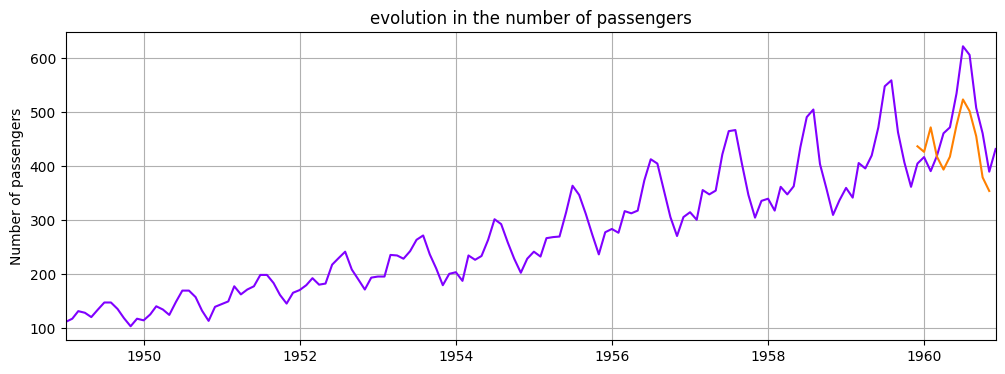

Epoch: 88 Loss: 0.00322199


<Figure size 1000x300 with 0 Axes>

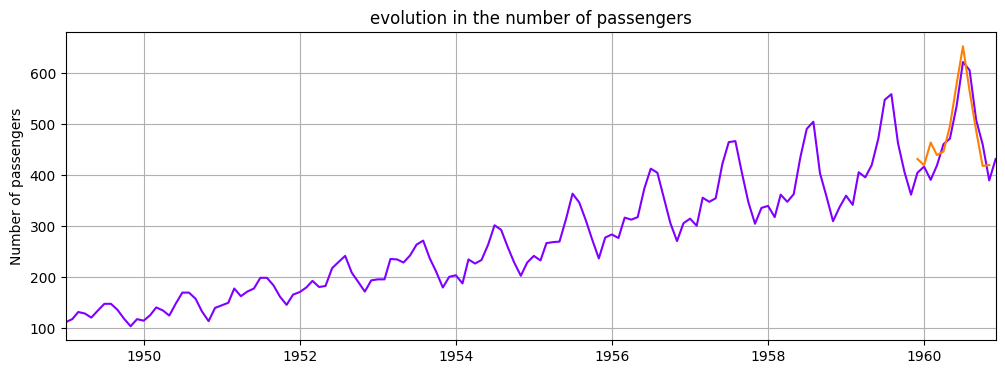

Epoch: 89 Loss: 0.00040407


<Figure size 1000x300 with 0 Axes>

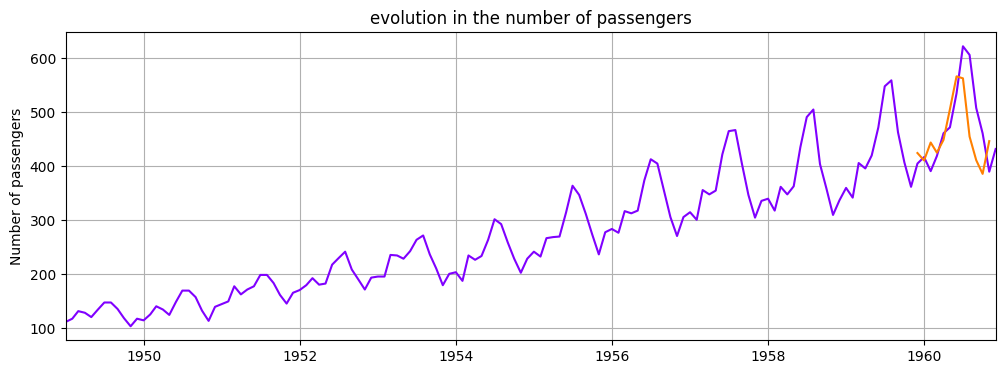

Epoch: 90 Loss: 0.00047144


<Figure size 1000x300 with 0 Axes>

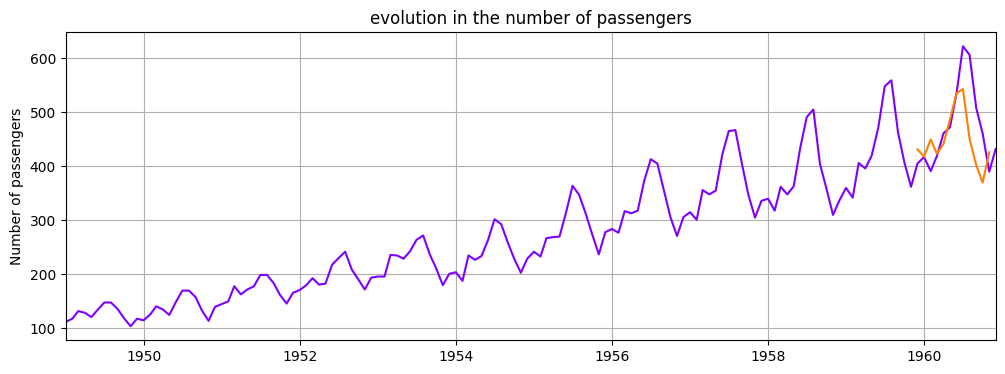

Epoch: 91 Loss: 0.00005610


<Figure size 1000x300 with 0 Axes>

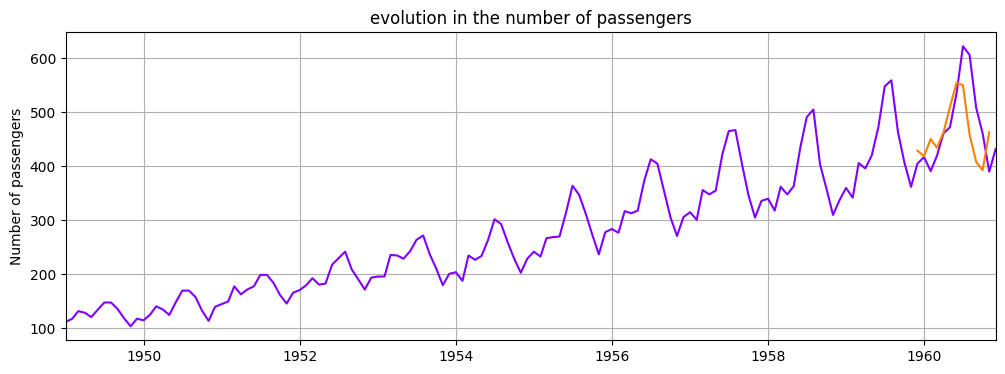

Epoch: 92 Loss: 0.00007747


<Figure size 1000x300 with 0 Axes>

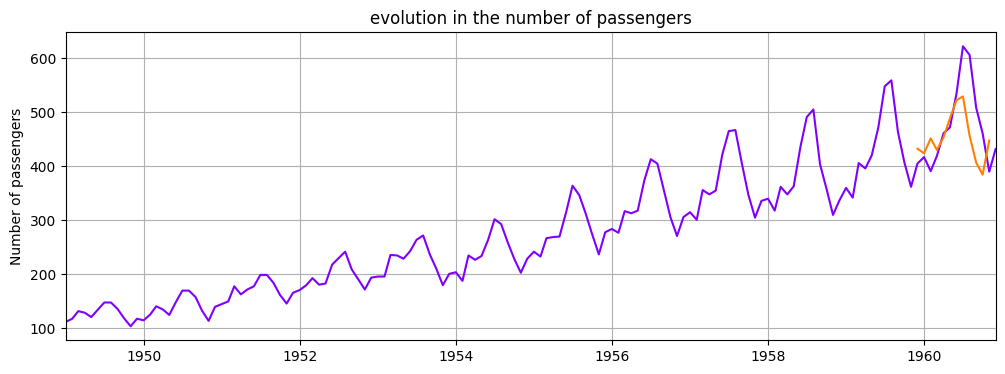

Epoch: 93 Loss: 0.00001155


<Figure size 1000x300 with 0 Axes>

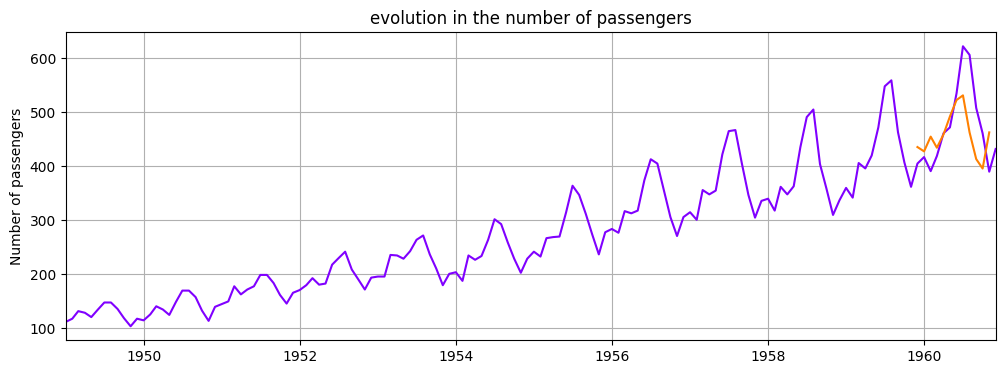

Epoch: 94 Loss: 0.00013784


<Figure size 1000x300 with 0 Axes>

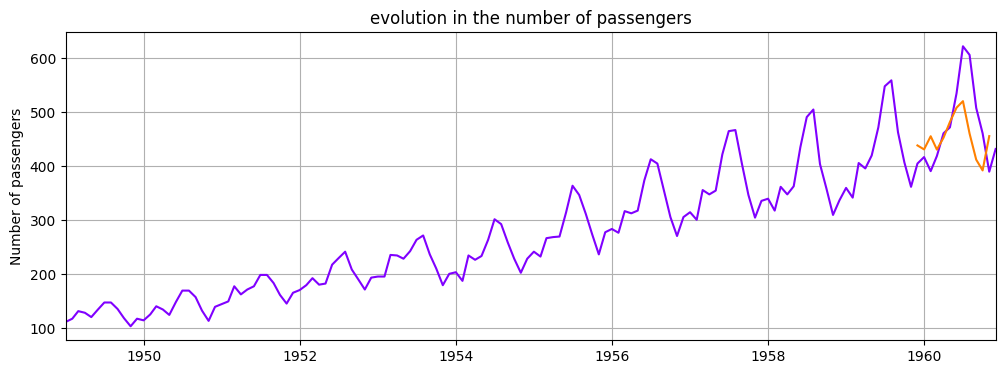

Epoch: 95 Loss: 0.00001949


<Figure size 1000x300 with 0 Axes>

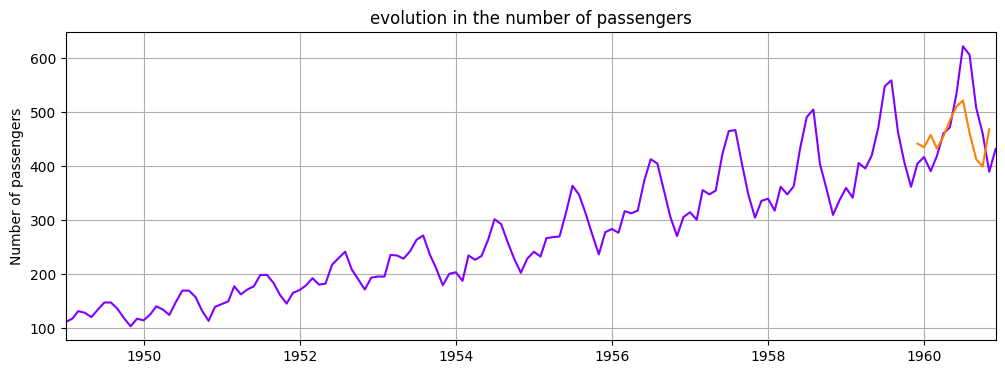

Epoch: 96 Loss: 0.00038238


<Figure size 1000x300 with 0 Axes>

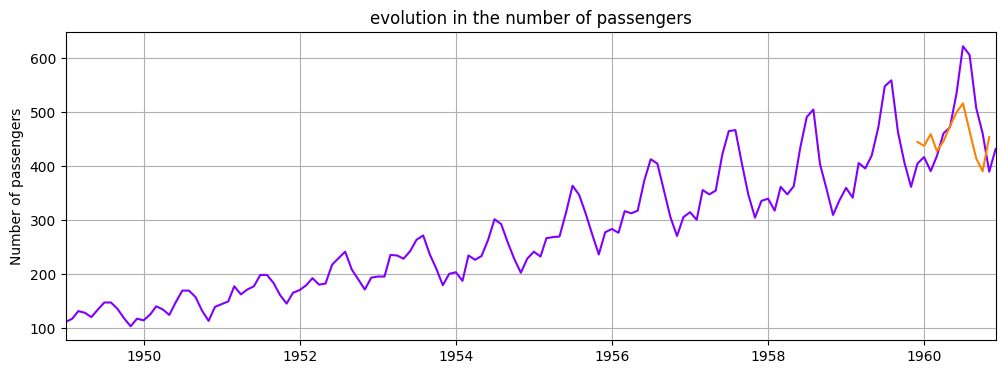

Epoch: 97 Loss: 0.00147460


<Figure size 1000x300 with 0 Axes>

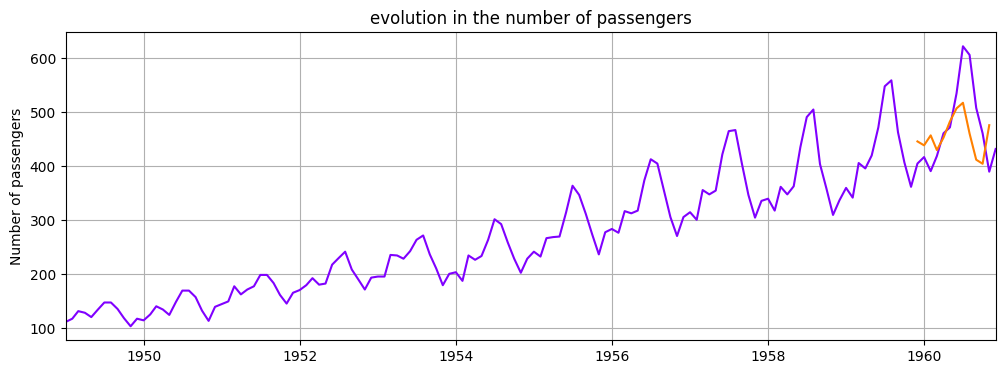

Epoch: 98 Loss: 0.00298169


<Figure size 1000x300 with 0 Axes>

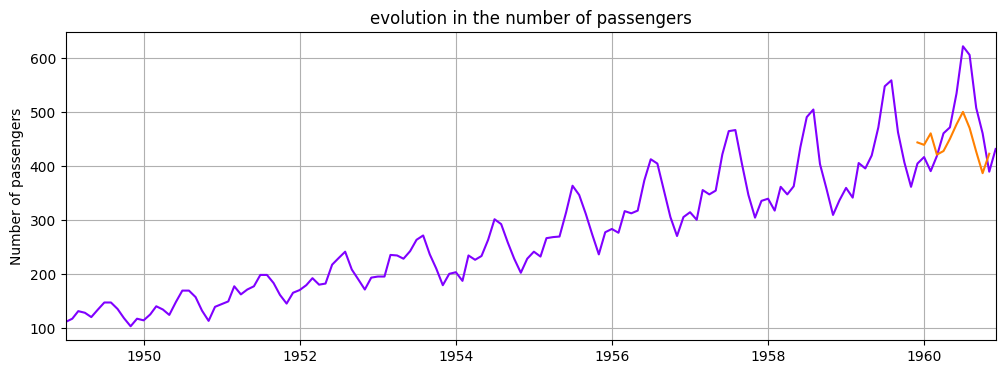

Epoch: 99 Loss: 0.00800207


<Figure size 1000x300 with 0 Axes>

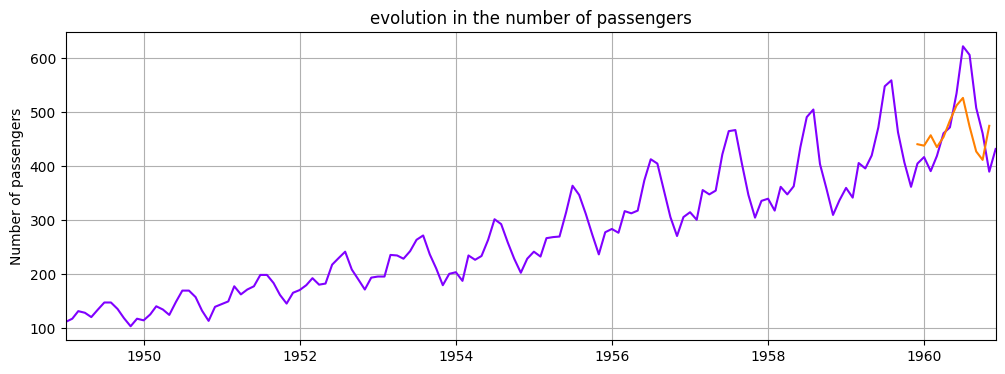

Epoch: 100 Loss: 0.02107108


<Figure size 1000x300 with 0 Axes>

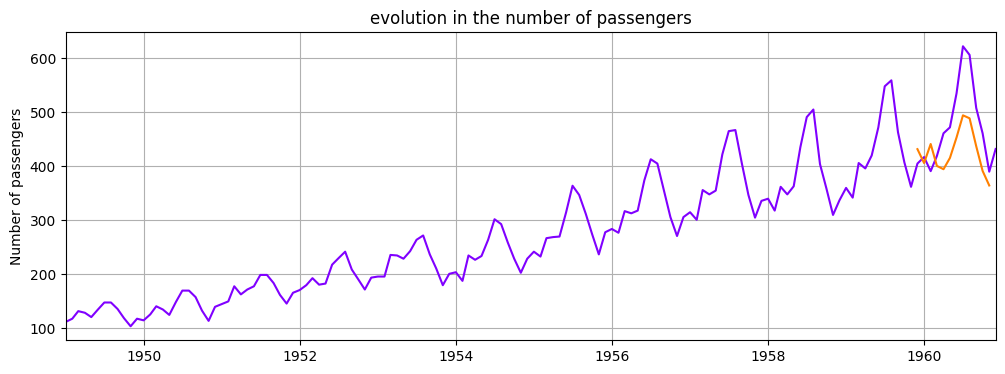


Duration: 71 seconds


In [ ]:
epochs = 100

import time
start_time = time.time()

for epoch in range(epochs):
    for seq, y_train in train_data:
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))

        y_pred = model(seq)

        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()

    print(f'Epoch: {epoch+1:2} Loss: {loss.item():10.8f}')

    future = 12

    preds = train_norm[-window_size:].tolist()

    model.eval()

    for i in range(future):
        seq = torch.FloatTensor(preds[-window_size:])
        with torch.no_grad():
            model.hidden = (torch.zeros(1,1,model.hidden_size),
                            torch.zeros(1,1,model.hidden_size))
            preds.append(model(seq).item())
    preds[window_size:]

    true_predictions = scaler.inverse_transform(np.array(preds[window_size:]).reshape(-1, 1))

    plt.figure(figsize = (10,3))
    x = np.arange('1959-12', '1960-12', dtype='datetime64[M]').astype('datetime64[D]')
    plt.figure(figsize=(12,4))
    plt.title('evolution in the number of passengers')
    plt.ylabel('Number of passengers')
    plt.grid(True)
    plt.autoscale(axis='x',tight=True)
    plt.plot(df['#Passengers'], color='#8000ff')
    plt.plot(x, true_predictions, color='#ff8000')
    plt.show()

print(f'\nDuration: {time.time() - start_time:.0f} seconds')



In [ ]:
future = 12

preds = train_norm[-window_size:].tolist()

model.eval()

for i in range(future):
    seq = torch.FloatTensor(preds[-window_size:])
    with torch.no_grad():
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))
        preds.append(model(seq).item())
preds[window_size:]

[0.4262875020503998,
 0.3265397548675537,
 0.5195953249931335,
 0.4851672351360321,
 0.6494787335395813,
 0.7903068661689758,
 1.0883586406707764,
 0.8361734747886658,
 0.5245587229728699,
 0.3150269687175751,
 0.30278894305229187,
 0.5314451456069946]

In [ ]:
df['#Passengers'][-12:]

Month
1960-01-01    417
1960-02-01    391
1960-03-01    419
1960-04-01    461
1960-05-01    472
1960-06-01    535
1960-07-01    622
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, dtype: int64

In [ ]:
true_predictions = scaler.inverse_transform(np.array(preds[window_size:]).reshape(-1, 1))
true_predictions

array([[428.48040672],
       [405.78779423],
       [449.70793644],
       [441.87554599],
       [479.25641188],
       [511.29481205],
       [579.10159075],
       [521.72946551],
       [450.83710948],
       [403.16863538],
       [400.38448454],
       [452.40377063]])

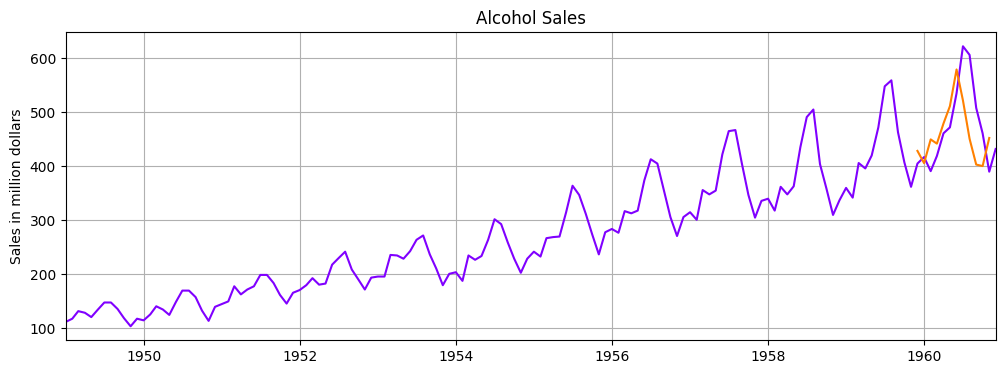

In [ ]:
x = np.arange('1959-12', '1960-12', dtype='datetime64[M]').astype('datetime64[D]')
plt.figure(figsize=(12,4))
plt.title('Alcohol Sales')
plt.ylabel('Sales in million dollars')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(df['#Passengers'], color='#8000ff')
plt.plot(x, true_predictions, color='#ff8000')
plt.show()

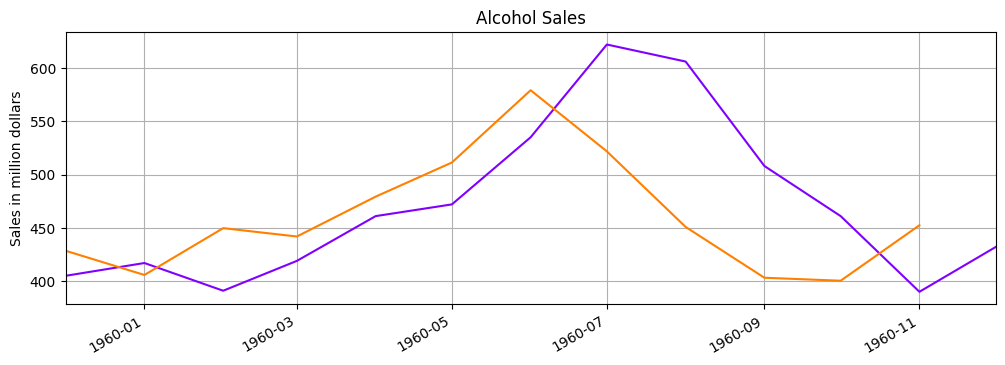

In [ ]:
fig = plt.figure(figsize=(12,4))
plt.title('Alcohol Sales')
plt.ylabel('Sales in million dollars')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
fig.autofmt_xdate()

plt.plot(df['#Passengers']['1959-12':], color='#8000ff')
plt.plot(x,true_predictions, color='#ff8000')
#plt.savefig('/content/drive/MyDrive/RNNs_teste/previsao_2.png')
#plt.show()

